## install libraries

In [1]:
!pip install pingouin
!pip install bioinfokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 45.9 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=49f73fe706aae12efe6cb30b548ca96af2b6019440ee57154781ad0ba3f16c28
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=4663654409115d8b51f73d3a33983390dc0bb8dfa7a124de5488e107856c302f
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple

In [2]:
from google.colab.data_table import DataTable
import sys
import pandas as pd
import os
import glob
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import pearsonr
import seaborn as sn
import matplotlib.pyplot as plt
from bioinfokit.analys import stat
import pingouin as pt

# create data

##load data from chrome

In [3]:
from google.colab import data_table
from google.colab import drive
DataTable.max_columns = 80
drive.mount('/content/drive')
path='/content/drive/MyDrive/data-research'

Mounted at /content/drive


## const veriable

In [4]:

file_part_1 = "file_part_1"
true = 1.0
false = 0.0

experiment = "experiment"
stroop_corr = "stroop_anser.corr"
common = "common"
true_shape = "true_shaps"
file_part_2 = "expriment_file"
congruent = "congruent"
not_image_file_part_2 = "not_image"
cerainty_file_part_2 = "cerainty"
uncertainty_file_part_2 = "uncertainty"
part_1 = "part_1"
answer_test_currect = 'test_uncertainty_anser_currect'
click_name = "test_mouse_anser_rual.clicked_name"
infrequnce_error = 'infrequnce_error'
stress = "stress"
anxiety = "anxiety"
general = "general"
participant = "participant"
click_place_name = "test_certainty_mouse.clicked_name"

## load data from file - csv (part 1)

In [5]:
path_file = path + "/" + file_part_1
csv_files = glob.glob(os.path.join(path_file, "*.csv"))
dfs1 = pd.concat([pd.read_csv(f,na_values="").fillna(value = 0) for f in  csv_files])
dfs1 = dfs1[(dfs1['experiment'] == "certainty")]
dfs1.tail(4)

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsLeft,corrAnsRight,common,experiment,...,test_certainty_mouse.rightButton,test_certainty_mouse.time,test_certainty_mouse.clicked_name,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 58
217,ירוק,blue,c,0.0,Image_certainty//image3_alemnt4.jpg,4.jpg,one_middle_left,one_up_right,infrequent,certainty,...,0.0,NaN,one_middle_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
218,אדום,green,x,0.0,Image_certainty//image48_alemnt9.jpg,9.jpg,one_down_left,one_down_right,widespread,certainty,...,0.0,NaN,0,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
219,כחול,green,x,0.0,Image_certainty//image59_alemnt14.jpg,14.jpg,two_down_left,one_down_right,widespread,certainty,...,0.0,NaN,two_down_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN
220,אדום,red,z,1.0,Image_certainty//image192_alemnt11.jpg,11.jpg,one_up_left,one_down_right,widespread,certainty,...,0.0,NaN,three_middle_left,15.0,1.0,2021_Dec_29_1047,untitled_1,2020.2.6,60.019795,NaN


## load data from file - xslx (part 2)

In [6]:
path_all = path + "/" + file_part_2
csv_files = glob.glob(os.path.join(path_all, "*.xlsx"))
dfs2 = pd.concat([pd.read_excel(f, sheet_name=f.split("/")[-1].split(".")[0],na_values="").fillna(value = 0) for f in csv_files])
dfs2_1 = dfs2[dfs2[experiment] == "uncertainty"]
dfs2_2 = dfs2[dfs2[experiment] == "certainty"]
dfs2_1.tail(4)



,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
229,ירוק,red,z,0,Image_uncertainty_1//image26_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,0.851711,0.851090,2271.503936,None,NaN
230,כחול,green,x,0,Image_uncertainty_1//image89_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.466125,2.465198,2280.679605,None,NaN
231,אדום,red,z,1,Image_uncertainty_1//image177_alemnt8.jpg,8.jpg,four_down,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.683353,1.681726,2288.589761,None,NaN
232,ירוק,blue,c,0,Image_uncertainty_1//image57_alemnt13.jpg,13.jpg,one_right,widespread,NaN,uncertainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.449324,2.448396,2298.181761,None,NaN


In [7]:
dfs2_2.tail(4)

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
429,כחול,red,z,0,Image_uncertainty_2//image76_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.000705,0.999628,4100.880304,None,NaN
430,כחול,red,z,0,Image_uncertainty_2//image58_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.134903,2.133987,4109.273416,None,NaN
431,ירוק,red,z,0,Image_uncertainty_2//image80_alemnt10.jpg,10.jpg,two_left,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.285299,0.000000,4116.917265,None,NaN
432,אדום,green,x,0,Image_uncertainty_2//image54_alemnt12.jpg,12.jpg,four_left,widespread,NaN,certainty,...,1,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.434595,1.432427,4125.194037,None,NaN


#graph

## kdeplot

In [8]:
def kdeplot(name1, name2, a, b, title):
  sn.kdeplot(data=a, shade=True, color="red", label=name1)
  sn.kdeplot(data=b, shade=True, color="blue", label=name2)
  plt.title(title)
  plt.legend()
  plt.show()

##barplot

In [9]:
def barplot(c1, c2, bar1, bar2, title):
    SMALL_SIZE = 15
    MEDIUM_SIZE = 15
    BIGGER_SIZE = 15
    plt.rcParams['figure.facecolor'] = "dimgrey"
    plt.rc('font', size=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)
    plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    plt.tick_params(labelsize=15)
    c = ['steelblue', 'lightpink','limegreen',  'blue']
    plt.bar([c1,c2],[bar1.mean(),bar2.mean()],width=0.4, color=c, alpha=0.7)
    # plt.rcParams['figure.set_alpha'] = 0.1
    plt.title(title)
    
    plt.box(on=None)
    plt.ylabel("Error Rate")
    n = len(bar1.axes[0])
    std = ((np.std(bar1 - bar2)/np.sqrt(n))) * (n/(n-1))
    std1, std2 = bar1.std(), bar2.std()
    n1, n2 = len(bar1), len(bar2)
    se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # print(std1, std2, n1, n2, se1, se2, sed)
    # print(std)

    plt.errorbar([c1,c2], [bar1.mean(),bar2.mean()], yerr=[std, std], fmt="o", color="black")
    plt.show()
    plt.rcParams['figure.facecolor'] = "white"

##graphs for anova test after melt

In [10]:
def anovagraphs(dfs_anova, col_v='common', x_val="congruent", value='value'):
    sn.catplot(kind='bar',
           data=dfs_anova,
           x=x_val, hue=col_v, y=value)
    sn.catplot(kind='box',
           data=dfs_anova,
           x=x_val, hue=col_v, y=value)
    sn.catplot(kind='point',
           data=dfs_anova,
            x=x_val, hue=col_v, y=value)
    sn.catplot(kind='strip',
           data=dfs_anova,
            x=x_val, col=col_v, y=value, hue='participant')
    sn.catplot(kind='point',
           data=dfs_anova,
            x=x_val, col=col_v, y=value, hue='participant')


# Stroop

## accuracy stroop

In [11]:
def accuracyStroop(dfs, block):
  accuracy_stroop = dfs[(dfs['stroop_anser.corr'] == true) & (dfs['experiment'] != 0)].pivot_table( 
    index=["participant"], columns=[congruent], values=[], aggfunc=[len])
  accuracy_stroop.columns = accuracy_stroop.columns.droplevel(0)
  a = accuracy_stroop[0.0]
  b = accuracy_stroop[1.0]
  print('0: ', a.mean(), a.std())
  print('1: ', b.mean(), b.std())
  res = stat()
  res.ttest(accuracy_stroop, res=[0, 1], test_type=3)
  print(res.summary)
  kdeplot("incongruent", "congrunet", a, b, "stroop accuracy: block " + str(block))
  barplot("incongruent", "congrunet", a, b, "stroop accuracy: block " + str(block))
  return accuracy_stroop


## time stroop

In [12]:
def timeStroop(dfs, block):
  time_stroop = dfs[(dfs['stroop_anser.corr'] == true) & (dfs['experiment'] != 0)].pivot_table( 
    index=["participant"], columns=[congruent], values=['stroop_anser.rt'], aggfunc=[np.mean])
  time_stroop.columns = time_stroop.columns.droplevel(0)
  time_stroop.columns = time_stroop.columns.droplevel(0)
  a = time_stroop[0.0]
  b = time_stroop[1.0]
  print('0: ', a.mean(), a.std())
  print('1: ', b.mean(), b.std())
  res = stat()
  res.ttest(time_stroop, res=[0, 1], test_type=3)
  print(res.summary)

  kdeplot("incongruent", "congrunet", a, b, "stroop time: block " + str(block))
  barplot("incongruent", "congrunet", a, b, "stroop time: block " + str(block))
  return time_stroop

0:  83.21212121212122 11.340628222671285
1:  88.78787878787878 9.215332250377546

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean     -5.57576
t                   -3.7764
Df                  32
P-value (one-tail)   0.000326765
P-value (two-tail)   0.000653529
Lower 95.0%         -8.58324
Upper 95.0%         -2.56827
------------------  ------------


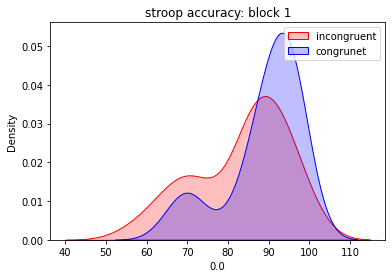

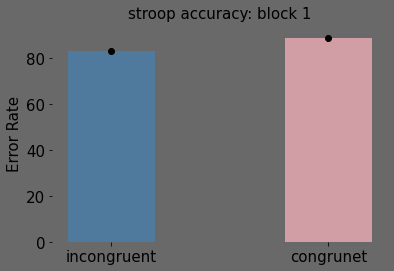

0:  0.7765519281190597 0.08123649275757192
1:  0.7104245959700088 0.08625115113675345

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean      0.0661273
t                    7.96461
Df                  32
P-value (one-tail)   2.16012e-09
P-value (two-tail)   4.32025e-09
Lower 95.0%          0.0492154
Upper 95.0%          0.0830393
------------------  ------------


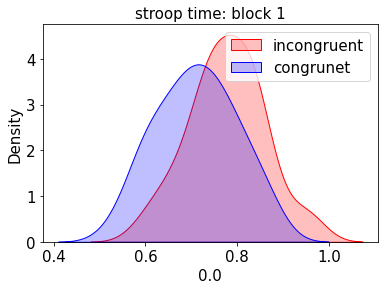

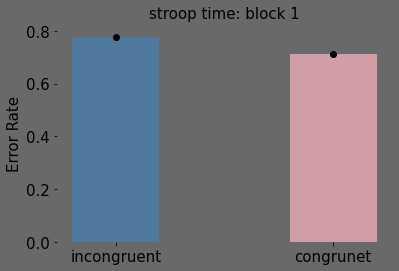

accuracy: expected for 36: 0 = 94, 1 = 89


congruent
0.0    94
1.0    89
Name: 36.0, dtype: int64

time: expected for 36: 0 = 0.765, 1 = 0.750


congruent
0.0    0.764211
1.0    0.750177
Name: 36.0, dtype: float64

In [13]:
dfs1_accuracy_stroop = accuracyStroop(dfs1, 1)
dfs1_time_stroop = timeStroop(dfs1, 1)


print("accuracy: expected for 36: 0 = 94, 1 = 89")
display(dfs1_accuracy_stroop.loc[36.0])

print("time: expected for 36: 0 = 0.765, 1 = 0.750")
display(dfs1_time_stroop.loc[36.0])

0:  85.54545454545455 9.121029646820682
1:  88.93939393939394 6.900812424723057

Paired t-test 

------------------  -----------
Sample size         33
Difference Mean     -3.39394
t                   -3.33161
Df                  32
P-value (one-tail)   0.00109389
P-value (two-tail)   0.00218779
Lower 95.0%         -5.46898
Upper 95.0%         -1.3189
------------------  -----------


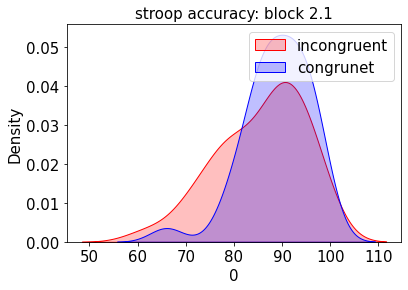

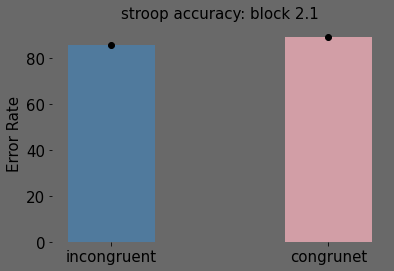

0:  0.7678586409578261 0.07029631576025691
1:  0.6987280148506212 0.0784148777887669

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean      0.0691306
t                    9.78949
Df                  32
P-value (one-tail)   1.90279e-11
P-value (two-tail)   3.80558e-11
Lower 95.0%          0.0547464
Upper 95.0%          0.0835149
------------------  ------------


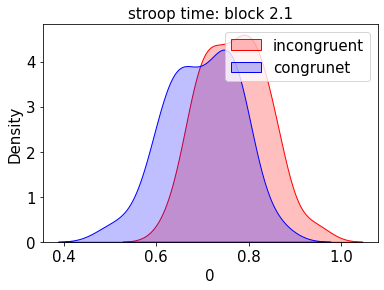

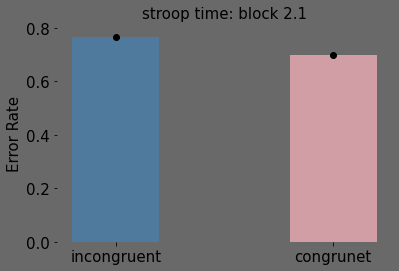

In [14]:
dfs2_1_accuracy_stroop = accuracyStroop(dfs2_1, 2.1)
dfs2_1_time_stroop = timeStroop(dfs2_1, 2.1)
# dfs2_1_accuracy_stroop

0:  80.60606060606061 11.693853604403133
1:  84.60606060606061 10.532507399532749

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean     -4
t                   -3.38107
Df                  32
P-value (one-tail)   0.000958762
P-value (two-tail)   0.00191752
Lower 95.0%         -6.40981
Upper 95.0%         -1.59019
------------------  ------------


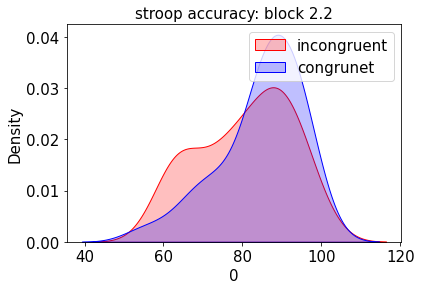

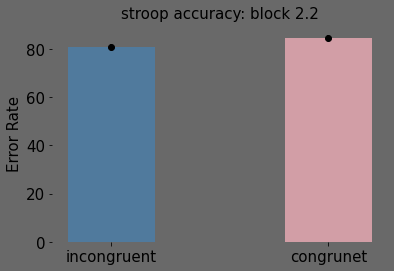

0:  0.780831820566464 0.08183201824429442
1:  0.7201846600328763 0.0870569350034577

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean      0.0606472
t                    9.68369
Df                  32
P-value (one-tail)   2.47396e-11
P-value (two-tail)   4.94791e-11
Lower 95.0%          0.0478902
Upper 95.0%          0.0734041
------------------  ------------


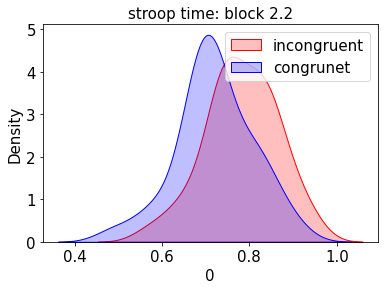

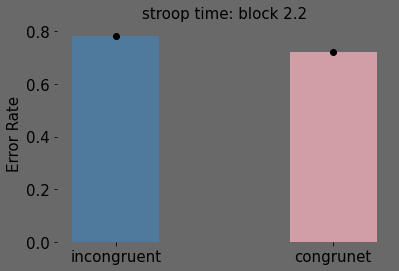

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
221,ירוק,blue,c,0,Image_uncertainty_2//image69_alemnt8.jpg,8.jpg,four_down,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.350419,1.349696,2238.801855,None,NaN
222,כחול,blue,c,1,Image_uncertainty_2//image197_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.469452,1.467285,2247.351530,None,NaN
223,אדום,green,x,0,Image_uncertainty_2//image36_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.051821,1.050707,2255.317759,None,NaN
224,אדום,red,z,1,Image_uncertainty_2//image165_alemnt9.jpg,9.jpg,one_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,2.203519,2.201728,2264.250504,None,NaN
225,כחול,blue,c,1,Image_uncertainty_2//image134_alemnt11.jpg,11.jpg,three_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.784835,1.784085,2272.650114,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,כחול,red,z,0,Image_uncertainty_2//image4_alemnt5.jpg,5.jpg,one_down,infrequent,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.451578,1.450283,3943.413661,None,NaN
417,אדום,red,z,1,Image_uncertainty_2//image123_alemnt12.jpg,12.jpg,four_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.850546,1.849850,3952.180240,None,NaN
418,ירוק,green,x,1,Image_uncertainty_2//image124_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.401352,1.400176,3960.113013,None,NaN
419,אדום,red,z,1,Image_uncertainty_2//image198_alemnt12.jpg,12.jpg,four_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.937371,1.934953,3969.179418,None,NaN


accuracy: expected for 36: 0 = 87, 1 = 88


congruent
0    87
1    88
Name: 36, dtype: int64

time: expected for 36: 0 = 0.712, 1 = 0.651


congruent
0    0.709095
1    0.656107
Name: 36, dtype: float64

In [15]:
dfs2_2_accuracy_stroop = accuracyStroop(dfs2_2, 2.2)
dfs2_2_time_stroop = timeStroop(dfs2_2, 2.2)

display(dfs2_2[dfs2_2['participant'] == 36])
print("accuracy: expected for 36: 0 = 87, 1 = 88")
display(dfs2_2_accuracy_stroop.loc[36.0])

print("time: expected for 36: 0 = 0.712, 1 = 0.651")
display(dfs2_2_time_stroop.loc[36.0])

0:  249.36363636363637 27.408732848558255
1:  262.3333333333333 22.13264933682063

Paired t-test 

------------------  -------------
Sample size          33
Difference Mean     -12.9697
t                    -4.86052
Df                   32
P-value (one-tail)    1.48969e-05
P-value (two-tail)    2.97939e-05
Lower 95.0%         -18.405
Upper 95.0%          -7.53439
------------------  -------------


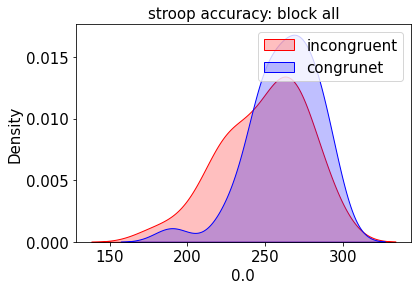

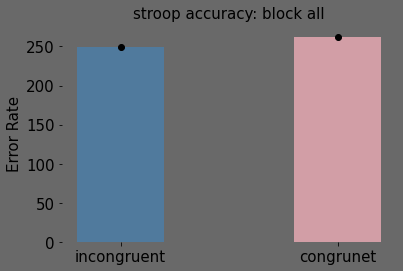

0:  0.7737235307344779 0.0677936998354116
1:  0.7089691433161375 0.07617054563920712

Paired t-test 

------------------  ------------
Sample size         33
Difference Mean      0.0647544
t                   10.1322
Df                  32
P-value (one-tail)   8.21322e-12
P-value (two-tail)   1.64264e-11
Lower 95.0%          0.0517364
Upper 95.0%          0.0777724
------------------  ------------


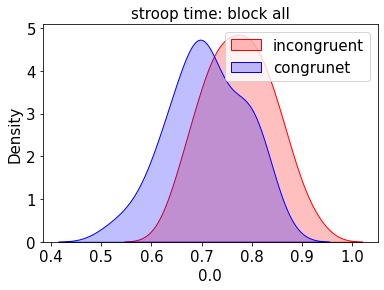

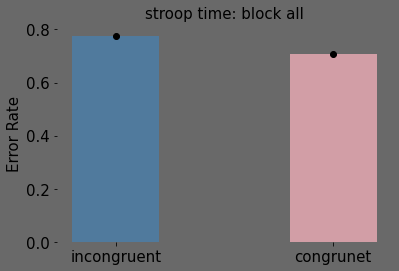

In [16]:
dfs_all = dfs1.append(dfs2_1, ignore_index=True)
dfs_all = dfs_all.append(dfs2_2, ignore_index=True)
dfs1_accuracy_stroop = accuracyStroop(dfs_all, 'all')
dfs1_time_stroop = timeStroop(dfs_all, 'all')

## error per participant

mean: 283.7979797979798 std: 27.019018429660928


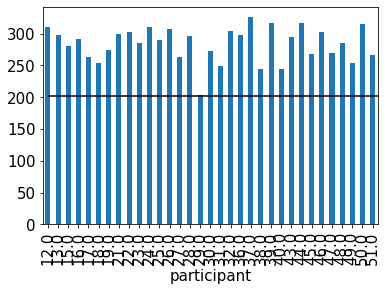

all test : for 36 : 94, 89, 90, 90, 88, 87


0    271
1    267
2     90
3     90
4     87
5     88
Name: 36.0, dtype: int64

stroop_result_all : for 36: sum 179.3


297.6666666666667

stroop_result_all : for 36: mean 2.422


93.09654486964952

mean: 511.6969696969697 std: 47.40482889991592


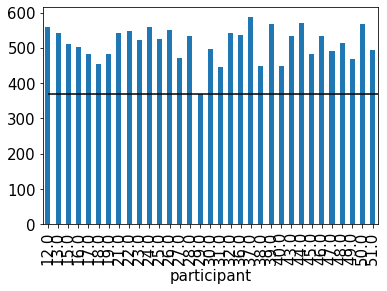

mean: 174.4848484848485 std: 15.07921005084735


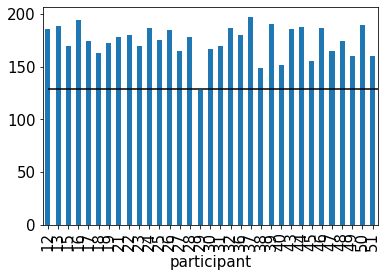

mean: 165.21212121212122 std: 21.193686524171497


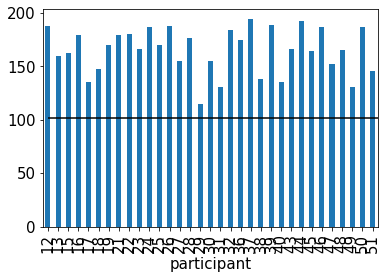

In [17]:
num_std_dist = 3

all_test = pd.concat([dfs1_accuracy_stroop, dfs2_1_accuracy_stroop, dfs2_2_accuracy_stroop], axis=1, ignore_index=True,)
stroop_result_all = all_test.sum(axis=1) / 3
mean_result, std_result = stroop_result_all.mean(), stroop_result_all.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_all.plot.bar(x='participant')
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()


print("all test : for 36 : 94, 89, 90, 90, 88, 87" )
display(all_test.loc[36.0])

print("stroop_result_all : for 36: sum 179.3" )
display(stroop_result_all.loc[36.0])


print("stroop_result_all : for 36: mean 2.422" )
display(all_test.loc[36.0].std())


stroop_result_1 = dfs1_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_1.mean(), stroop_result_1.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_1.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()

stroop_result_2_1 = dfs2_1_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_2_1.mean(), stroop_result_2_1.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_2_1.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()

stroop_result_2_2 = dfs2_2_accuracy_stroop.sum(axis=1)
mean_result, std_result = stroop_result_2_2.mean(), stroop_result_2_2.std()
print("mean: " + str(mean_result) + " std: " + str(std_result))
stroop_result_2_2.plot.bar(x='participant',)
plt.hlines(mean_result - num_std_dist*std_result, 0, 100, color='black')
plt.show()


# show widsp 

In [18]:
display(dfs2_2[dfs2_2['participant'] == 30]["true_shaps"].value_counts())
display(dfs2_1[dfs2_1['participant'] == 30]["true_shaps"].value_counts())
display(dfs1[dfs1['participant'] == 30]["true_shaps"].value_counts())



# dfs2_2.loc[(dfs2_2["true_shaps"] == '10.jpg') | (dfs2_2["true_shaps"] == '8.jpg') |
#        (dfs2_2["true_shaps"] == '14.jpg') |  (dfs2_2["true_shaps"] == '12.jpg') 
#        | (dfs2_2["true_shaps"] == '9.jpg') | (dfs2_2["true_shaps"] == '13.jpg')
#        | (dfs2_2["true_shaps"] == '11.jpg') ,'common'] = 'widespread'
# dfs2_2.loc[(dfs2_2["true_shaps"] == '7.jpg')  | (dfs2_2["true_shaps"] == '5.jpg') 
#        | (dfs2_2["true_shaps"] == '2.jpg') | (dfs2_2["true_shaps"] == '1.jpg')
#        | (dfs2_2["true_shaps"] == '4.jpg') |  (dfs2_2["true_shaps"] == '6.jpg'), 'common'] = 'infrequent'
# dfs2_2.loc[(dfs2_2["true_shaps"] == '3.jpg'), 'common'] = 0 


8.jpg     26
14.jpg    25
12.jpg    23
10.jpg    23
9.jpg     22
13.jpg    21
11.jpg    20
3.jpg     15
5.jpg      8
2.jpg      5
7.jpg      4
1.jpg      3
6.jpg      3
4.jpg      2
Name: true_shaps, dtype: int64

-1.jpg    40
1.jpg     15
9.jpg     15
8.jpg     15
7.jpg     14
12.jpg    13
13.jpg    13
4.jpg     11
2.jpg     11
6.jpg     11
11.jpg    10
10.jpg     9
14.jpg     9
5.jpg      7
3.jpg      7
Name: true_shaps, dtype: int64

11.jpg    27
9.jpg     25
12.jpg    24
13.jpg    23
14.jpg    21
8.jpg     21
10.jpg    19
2.jpg      9
6.jpg      8
4.jpg      6
7.jpg      5
5.jpg      4
1.jpg      4
3.jpg      4
Name: true_shaps, dtype: int64

# cleanup data - without stroop error and without trail

In [19]:
dfs1 = dfs1[(dfs1['stroop_anser.corr'] == true) & (dfs1['experiment'] != 0)]
dfs2_1 = dfs2_1[(dfs2_1['stroop_anser.corr'] == true) & (dfs2_1['experiment'] != 0)]
dfs2_2 = dfs2_2[(dfs2_2['stroop_anser.corr'] == true) & (dfs2_2['experiment'] != 0) & (dfs2_2['common'] != 0)]
display(dfs2_2[dfs2_2[participant] == 36])

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,session,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty
221,ירוק,blue,c,0,Image_uncertainty_2//image69_alemnt8.jpg,8.jpg,four_down,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.350419,1.349696,2238.801855,None,NaN
222,כחול,blue,c,1,Image_uncertainty_2//image197_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.469452,1.467285,2247.351530,None,NaN
223,אדום,green,x,0,Image_uncertainty_2//image36_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.051821,1.050707,2255.317759,None,NaN
224,אדום,red,z,1,Image_uncertainty_2//image165_alemnt9.jpg,9.jpg,one_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,2.203519,2.201728,2264.250504,None,NaN
225,כחול,blue,c,1,Image_uncertainty_2//image134_alemnt11.jpg,11.jpg,three_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.784835,1.784085,2272.650114,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,אדום,green,x,0,Image_uncertainty_2//image60_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,2.419081,2.416584,3935.581063,None,NaN
416,כחול,red,z,0,Image_uncertainty_2//image4_alemnt5.jpg,5.jpg,one_down,infrequent,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.451578,1.450283,3943.413661,None,NaN
417,אדום,red,z,1,Image_uncertainty_2//image123_alemnt12.jpg,12.jpg,four_left,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.850546,1.849850,3952.180240,None,NaN
418,ירוק,green,x,1,Image_uncertainty_2//image124_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,1,2022_Mar_07_1654,untitled_2,2020.2.6,59.901941,1.401352,1.400176,3960.113013,None,NaN


In [20]:
dfs1_accurcy1 = dfs1.pivot_table(index=["participant"], 
                                columns=["test_certainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_accurcy1 = dfs2.pivot_table(index=["participant"], 
                                columns=["test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
x = (dfs1_accurcy1 + dfs2_accurcy1)
display(x.columns)
display((x[('len', True)] / x[('len', True)] + x[('len',    0)]))
(x[('len', True)] / (x[('len', True)] + x[('len',    0)])).mean()

MultiIndex([('len',    0),
            ('len', True)],
           names=[None, 'test_certainty_anser_currect'])

participant
12.0    268.0
13.0    208.0
15.0    266.0
16.0    197.0
17.0    219.0
18.0    274.0
19.0    235.0
21.0    268.0
22.0    251.0
23.0    264.0
24.0    206.0
25.0    319.0
26.0    290.0
27.0    247.0
28.0    247.0
29.0    276.0
30.0    287.0
31.0    285.0
32.0    262.0
36.0    314.0
37.0    230.0
38.0    264.0
39.0    220.0
40.0    272.0
43.0    290.0
44.0    233.0
45.0    247.0
46.0    276.0
47.0    280.0
48.0    294.0
49.0    288.0
50.0    250.0
51.0    257.0
dtype: float64

0.5658318298298761

# part 1

## accurcy as function of common

for 36: infre, 0 : 8,  infre, 1 : 11, wides, 0: 54, wides, 1 : 47


congruent  common    
0.0        infrequent     8
           widespread    54
1.0        infrequent    11
           widespread    47
Name: 36.0, dtype: int64

for 36: mean: 30 , std: 23.87
mean: 30.0 std: 23.874672772626646


mean        std
congruent common                          
0.0       infrequent  13.090909   2.972411
          widespread  55.666667  10.166325
1.0       infrequent  13.666667   2.618046
          widespread  60.060606   8.710408

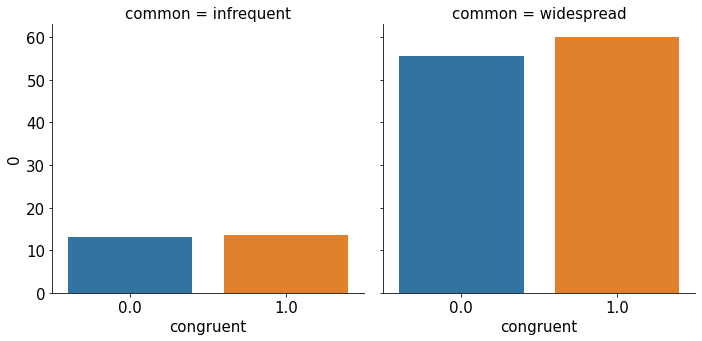

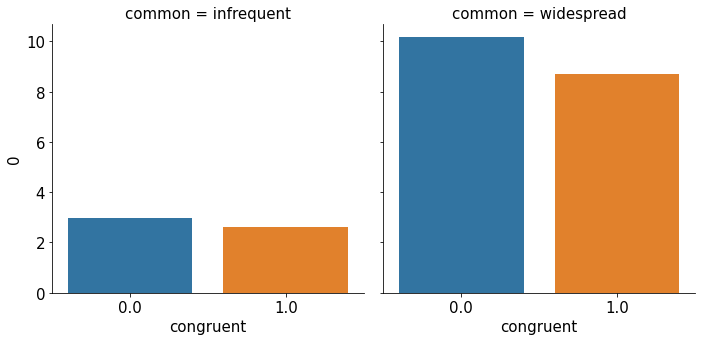

In [21]:
dfs1_accurcy = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_certainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs1_accurcy.columns = dfs1_accurcy.columns.droplevel([0, 3])


print("for 36: infre, 0 : 8,  infre, 1 : 11, wides, 0: 54, wides, 1 : 47")
display(dfs1_accurcy.loc[36.0])
print("for 36: mean: 30 , std: 23.87")
print("mean: " + str(dfs1_accurcy.loc[36.0].mean()), "std: " + str(dfs1_accurcy.loc[36.0].std()))
x = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=["test_certainty_anser_currect"], values=[],
                                aggfunc=[len])


dfs1_accurcy_mean = pd.DataFrame({"mean": dfs1_accurcy.mean(), "std": dfs1_accurcy.std()})
sn.catplot(kind='bar', data=dfs1_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)
sn.catplot(kind='bar', data=dfs1_accurcy.std().reset_index(),
           col="common", x='congruent', y=0)
# dfs1_accurcy_mean["mean"].plot.bar(title="mean", hue='common')
# plt.show()
# dfs1_accurcy_mean["std"].plot.bar(title="std")
# plt.show()
dfs1_accurcy_mean

## time as function of common 

congruent  common    
0.0        infrequent    0.597126
           widespread    0.498428
1.0        infrequent    0.768998
           widespread    0.455709
dtype: float64

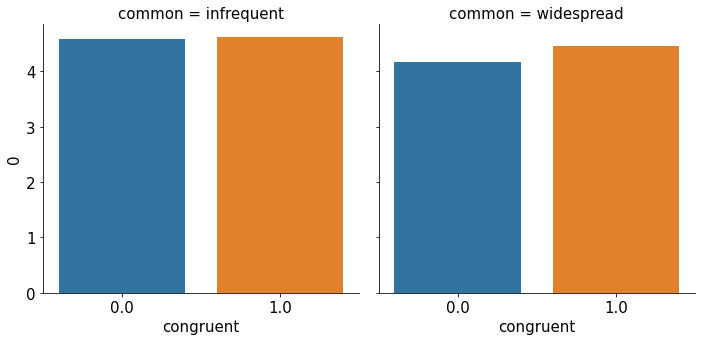

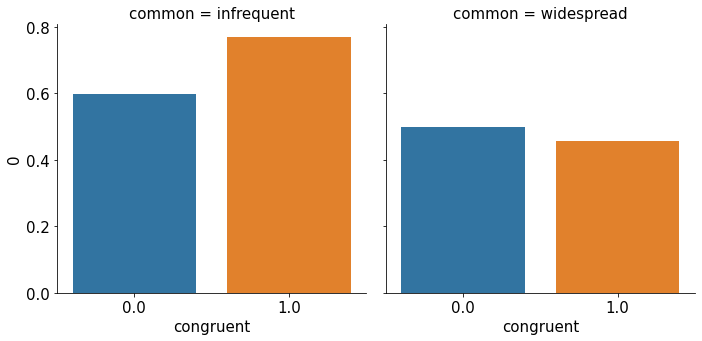

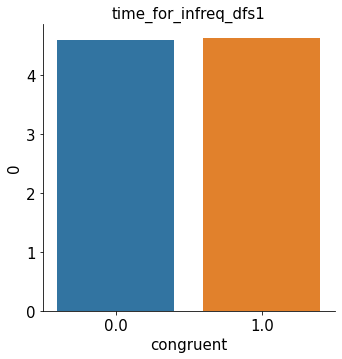

Ttest_relResult(statistic=-0.25773269675859695, pvalue=0.7982634882083001)

-0.2915608183067078

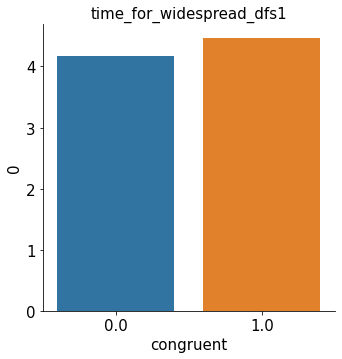

Ttest_relResult(statistic=-3.656716726113005, pvalue=0.0009088226694722756)

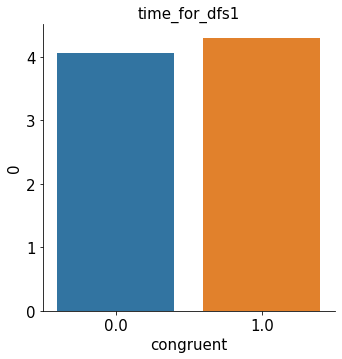

Ttest_relResult(statistic=-3.3840851480484586, pvalue=0.0020642999799113672)

In [22]:
dfs1_time = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[congruent, common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
dfs1_time.columns = dfs1_time.columns.droplevel(level=[0,1])

display(dfs1_time.std())
dfs1_time_mean = pd.DataFrame({"mean": dfs1_time.mean(), "std": dfs1_time.std()})
sn.catplot(kind='bar', data=dfs1_time.mean().reset_index(),
           col="common", x='congruent', y=0)
sn.catplot(kind='bar', data=dfs1_time.std().reset_index(),
           col="common", x='congruent', y=0)
plt.show()

time_for_infreq_dfs1 = dfs1_time.xs("infrequent", level=common, axis=1).reset_index(drop=True)
sn.catplot(kind='bar', data=time_for_infreq_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title("time_for_infreq_dfs1")
plt.show();
display(ttest_rel(time_for_infreq_dfs1[0.0], time_for_infreq_dfs1[1.0]))

time_for_widespread_dfs1 = dfs1_time.xs("widespread", level=common, axis=1).reset_index(drop=True)
display((time_for_widespread_dfs1[0.0] - time_for_widespread_dfs1[1.0]).mean())
sn.catplot(kind='bar', data=time_for_widespread_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title("time_for_widespread_dfs1")
plt.show();
display(ttest_rel(time_for_widespread_dfs1[0.0], time_for_widespread_dfs1[1.0]))

time_for_dfs1 = dfs1[dfs1["test_certainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                columns=[congruent], values=["test_certainty_mouse.time"],
                                aggfunc=[np.mean]).reset_index(drop=True)
time_for_dfs1.columns = time_for_dfs1.columns.droplevel(level=[0,1])
sn.catplot(kind='bar', data=time_for_dfs1.mean().reset_index(),
            x='congruent', y=0)
plt.title('time_for_dfs1')
plt.show();                    
display(ttest_rel(time_for_dfs1[0.0], time_for_dfs1[1.0]))                            

In [23]:
display(dfs1[(dfs1["test_certainty_anser_currect"] == True) & (dfs1[participant] == 36) & (dfs1["test_certainty_mouse.time"] != 0)])

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsLeft,corrAnsRight,common,experiment,...,test_certainty_mouse.rightButton,test_certainty_mouse.time,test_certainty_mouse.clicked_name,participant,session,date,expName,psychopyVersion,frameRate,Unnamed: 58
33,ירוק,green,x,1.0,Image_certainty//image190_alemnt12.jpg,12.jpg,one_down_left,one_middle_right,widespread,certainty,...,0.0,2.338028,one_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
34,ירוק,green,x,1.0,Image_certainty//image169_alemnt11.jpg,11.jpg,one_middle_left,one_up_right,widespread,certainty,...,0.0,4.920660,one_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
35,אדום,red,z,1.0,Image_certainty//image192_alemnt11.jpg,11.jpg,one_up_left,one_down_right,widespread,certainty,...,0.0,5.304968,one_down_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
37,כחול,green,x,0.0,Image_certainty//image23_alemnt9.jpg,9.jpg,one_up_left,two_up_right,widespread,certainty,...,0.0,4.086928,two_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
39,כחול,blue,c,1.0,Image_certainty//image161_alemnt12.jpg,12.jpg,one_down_left,two_middle_right,widespread,certainty,...,0.0,5.636619,two_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,אדום,blue,c,0.0,Image_certainty//image85_alemnt14.jpg,14.jpg,two_down_left,three_middle_right,widespread,certainty,...,0.0,2.091034,three_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
227,ירוק,green,x,1.0,Image_certainty//image148_alemnt13.jpg,13.jpg,one_middle_left,two_up_right,widespread,certainty,...,0.0,2.206121,two_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
229,כחול,red,z,0.0,Image_certainty//image76_alemnt14.jpg,14.jpg,three_middle_left,two_middle_right,widespread,certainty,...,0.0,1.653376,two_middle_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0
230,אדום,blue,c,0.0,Image_certainty//image43_alemnt11.jpg,11.jpg,two_down_left,one_up_right,widespread,certainty,...,0.0,6.237918,one_up_right,36.0,1.0,2022_Mar_07_1405,untitled_1,2020.2.6,60.020767,0.0


In [24]:
def create_se_on_graph(x, se):
  for j, i in enumerate(x.facet_axis(0,0).patches):
    print(i)
    xpoint = [i.get_x() + (i.get_width()/2), i.get_x() + (i.get_width()/2)]
    ypoint = [i.get_height()-se[j], i.get_height()+se[j]]
    plt.plot(xpoint, ypoint,color="black", linewidth=3.0, alpha=0.6)
    print(ypoint)

## anova accurcy as function of common & stroop

congruent          0.0                   1.0           
common      infrequent widespread infrequent widespread
participant                                            
12.0          0.888889   0.821918   0.736842   0.840000
13.0          0.894737   0.911392   0.789474   0.909091
15.0          0.700000   0.768116   0.647059   0.845070
16.0          0.769231   0.900000   0.923077   0.981132
17.0          0.937500   0.823529   0.928571   0.837838
18.0          0.846154   0.827586   0.533333   0.732143
19.0          0.714286   0.818182   0.687500   0.888889
21.0          0.777778   0.847222   0.842105   0.881579
22.0          0.736842   0.888889   0.800000   0.833333
23.0          0.800000   0.853333   0.777778   0.833333
24.0          0.736842   0.857143   0.777778   0.797468
25.0          0.666667   0.712121   0.500000   0.714286
26.0          0.611111   0.727273   0.705882   0.657895
27.0          0.909091   0.898305   0.875000   0.923077
28.0          1.000000   0.943662   0.666667   0.918919
29.0          0.666667   0.755556   0.733333   0.833333
30.0          0.733333   0.905405   0.777778   0.838235
31.0          0.500000   0.666667   0.750000   0.733333
32.0          0.789474   0.880597   0.833333   0.909091
36.0          0.470588   0.701299   0.647059   0.652778
37.0          0.842105   0.886076   0.750000   0.923077
38.0          0.642857   0.865385   0.842105   0.828947
39.0          0.888889   0.891892   0.944444   0.936709
40.0          0.750000   0.859649   0.789474   0.840580
43.0          0.875000   0.814286   0.650000   0.920000
44.0          0.894737   0.933333   0.900000   0.974026
45.0          0.916667   0.770492   0.687500   0.863014
46.0          0.909091   0.830189   0.894737   0.805195
47.0          0.882353   0.676471   0.789474   0.746479
48.0          0.750000   0.926471   0.882353   0.821918
49.0          0.894737   0.757576   0.812500   0.818182
50.0          0.850000   0.858974   0.850000   0.891892
51.0          0.882353   0.894737   0.947368   0.893333

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Frequency,0.092665,1,32,0.092665,19.495756,0.000108,0.000108,0.067172,1.0
1,Congruency,0.000084,1,32,0.000084,0.016491,0.898622,0.898622,0.000065,1.0
2,Frequency * Congruency,0.004920,1,32,0.004920,0.813514,0.373822,0.373822,0.003809,1.0


Rectangle(xy=(-0.4, 0), width=0.4, height=0.791757, angle=0)
[0.7776568815929357, 0.8058568815929357]
Rectangle(xy=(0.6, 0), width=0.4, height=0.832537, angle=0)
[0.8190371054025402, 0.8460371054025401]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=0.777955, angle=0)
[0.7695152934738693, 0.7863952934738693]
Rectangle(xy=(1, 0), width=0.4, height=0.843157, angle=0)
[0.8355768171311668, 0.8507368171311669]


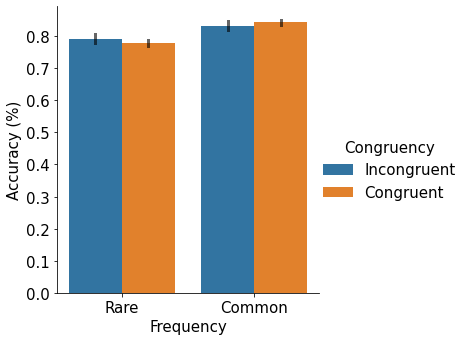

In [25]:
'''
this is a % of accurcy
'''
x = dfs1.pivot_table(index=["participant"], values=[],
                                columns=[congruent, common],
                                aggfunc=[len])
x.columns = x.columns.droplevel(level=[0])
dfs1_accurcy_div = dfs1_accurcy / x

'''
end
'''

dfs1_accurcy_reset = dfs1_accurcy_div.reset_index()
display(dfs1_accurcy_div)
dfs1_accurcy_melt = pd.melt(dfs1_accurcy_reset,id_vars=[("participant", '')],
              value_vars=[(0.0, 'infrequent'),(0.0, 'widespread'),(1.0, 'infrequent'), (1.0, 'widespread')])
dfs1_accurcy_melt = dfs1_accurcy_melt.rename(columns={("participant", ''): "participant"})

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {'value':'Accuracy (%)'})

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 0.0,"congruent"] = 'Incongruent'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 1.0, "congruent"] = 'Congruent'

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'widespread',"common"] = 'Common'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'infrequent', "common"] = 'Rare'

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {congruent:'Congruency'})
dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {common:'Frequency'})

display(pt.rm_anova(dv='Accuracy (%)', within=['Frequency', 'Congruency'], data=dfs1_accurcy_melt, subject="participant",
             detailed=True))
#anovagraphs(dfs1_accurcy_melt, 'Congruency', 'Frequency','accuracy (%)')
x = sn.catplot(kind='bar',
           data=dfs1_accurcy_melt, ci =None,
           x='Frequency', hue="Congruency", y='Accuracy (%)')
se = [0.0141, 0.0135, 0.00844, 0.00758]
create_se_on_graph(x, se)

# dfs1_accurcy

for 36: infre, 0: 17, infre, 1: 17, wides, 0:77, wides, 1: 72


congruent  common    
0.0        infrequent    17
           widespread    77
1.0        infrequent    17
           widespread    72
Name: 36.0, dtype: int64

for 36: infre, 0: (8/17)=0.47, infre, 1: (11/17)=0.647, wides, 0: (54/77)=0.701, wides, 1: (47/72)=0.652


congruent  common    
0.0        infrequent    0.470588
           widespread    0.701299
1.0        infrequent    0.647059
           widespread    0.652778
Name: 36.0, dtype: float64

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Frequency,0.092665,1,32,0.092665,19.495756,0.000108,0.000108,0.067172,1.0
1,Congruency,0.000084,1,32,0.000084,0.016491,0.898622,0.898622,0.000065,1.0
2,Frequency * Congruency,0.004920,1,32,0.004920,0.813514,0.373822,0.373822,0.003809,1.0


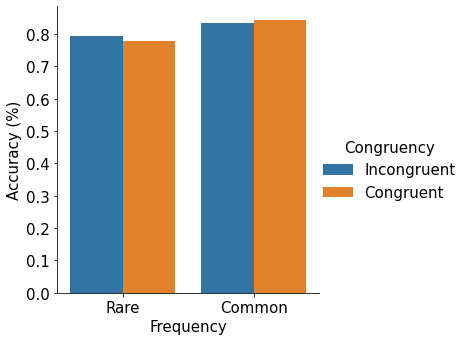

In [26]:
'''
this is a % of accurcy
'''
x = dfs1.pivot_table(index=["participant"], values=[],
                                columns=[congruent, common],
                                aggfunc=[len])
x.columns = x.columns.droplevel(level=[0])
dfs1_accurcy_div = dfs1_accurcy / x


print("for 36: infre, 0: 17, infre, 1: 17, wides, 0:77, wides, 1: 72")
display(x.loc[36.0])
print("for 36: infre, 0: (8/17)=0.47, infre, 1: (11/17)=0.647, wides, 0: (54/77)=0.701, wides, 1: (47/72)=0.652")
display(dfs1_accurcy_div.loc[36.0])


'''
end
'''

dfs1_accurcy_reset = dfs1_accurcy_div.reset_index()
dfs1_accurcy_melt = pd.melt(dfs1_accurcy_reset,id_vars=[("participant", '')],
              value_vars=[(0.0, 'infrequent'),(0.0, 'widespread'),(1.0, 'infrequent'), (1.0, 'widespread')])
dfs1_accurcy_melt = dfs1_accurcy_melt.rename(columns={("participant", ''): "participant"})

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {'value':'Accuracy (%)'})

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 0.0,"congruent"] = 'Incongruent'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["congruent"] == 1.0, "congruent"] = 'Congruent'

dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'widespread',"common"] = 'Common'
dfs1_accurcy_melt.loc[dfs1_accurcy_melt["common"] == 'infrequent', "common"] = 'Rare'

dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {congruent:'Congruency'})
dfs1_accurcy_melt=dfs1_accurcy_melt.rename(columns = {common:'Frequency'})

display(pt.rm_anova(dv='Accuracy (%)', within=['Frequency', 'Congruency'], data=dfs1_accurcy_melt, subject="participant",
             detailed=True))
#anovagraphs(dfs1_accurcy_melt, 'Congruency', 'Frequency','accuracy (%)')
x = sn.catplot(kind='bar',
           data=dfs1_accurcy_melt, ci =None,
           x='Frequency', hue="Congruency", y='Accuracy (%)')



# dfs1_accurcy

## anova time as function of common & stroop

congruent participant        0.0                   1.0           
common                infrequent widespread infrequent widespread
0                12.0   3.964118   4.182648   3.600695   4.049906
1                13.0   4.502381   4.169498   4.995862   4.599537
2                15.0   3.832910   4.652995   3.654911   3.781258
3                16.0   4.908532   3.715562   5.462707   3.817108
4                17.0   5.388301   5.517931   5.506234   5.243524
5                18.0   4.207387   3.925539   4.580268   4.423180
6                19.0   4.239346   5.111854   6.139685   5.309302
7                21.0   5.455263   3.293645   4.073956   4.078745
8                22.0   4.891926   3.737794   4.435150   5.091184
9                23.0   3.897920   4.196760   3.942433   4.312910
10               24.0   4.715303   3.975469   4.773233   4.192113
11               25.0   3.303854   4.405594   5.404726   4.575874
12               26.0   4.776112   4.153822   3.417655   4.452597
13               27.0   4.913139   4.251878   4.073352   3.905883
14               28.0   4.359245   4.301074   3.894824   3.973526
15               29.0   4.871908   4.281744   5.757738   4.890023
16               30.0   5.240067   3.594545   4.287886   4.389607
17               31.0   5.447502   4.998778   6.368437   4.535693
18               32.0   4.433733   3.709377   4.750940   4.189136
19               36.0   4.587396   4.169730   4.957712   4.351473
20               37.0   4.646158   4.592568   4.584133   4.820487
21               38.0   4.027802   3.803022   5.102840   3.955513
22               39.0   4.818486   4.296666   4.827830   4.593975
23               40.0   5.580045   4.131982   5.275405   4.997522
24               43.0   3.874107   3.540777   3.827123   3.956932
25               44.0   4.846013   3.458048   4.057998   3.999922
26               45.0   5.025189   4.247246   4.268370   4.129554
27               46.0   3.754242   3.724429   3.323898   4.341319
28               47.0   5.524494   4.631327   4.650433   5.147346
29               48.0   4.545119   4.687157   5.608383   4.804557
30               49.0   4.704636   4.384970   4.267097   5.354885
31               50.0   4.586994   4.432902   4.320311   4.774724
32               51.0   3.458164   3.539104   4.366757   4.398624

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,2.630046,1,32,2.630046,10.942039,0.002330,0.002330,0.055301,1.0
1,congruent,0.892280,1,32,0.892280,4.549675,0.040693,0.040693,0.019473,1.0
2,common * congruent,0.533314,1,32,0.533314,2.095303,0.157479,0.157479,0.011731,1.0


Rectangle(xy=(-0.4, 0), width=0.4, height=4.58569, angle=0)
[4.50024255622986, 4.67113876822986]
Rectangle(xy=(0.6, 0), width=0.4, height=4.17626, angle=0)
[4.088426067985524, 4.264085129985523]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=4.623, angle=0)
[4.559484092841567, 4.686514568841567]
Rectangle(xy=(1, 0), width=0.4, height=4.46782, angle=0)
[4.411076417292232, 4.5245564172922315]


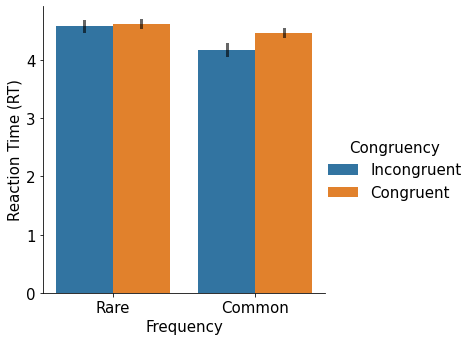

In [27]:
dfs1_time_reset = dfs1_time.reset_index()
x = dfs1_time_reset.copy()
display(x)
dfs1_time_reset = dfs1_time_reset[(dfs1_time_reset["participant"] != '12.0') &
                                  (dfs1_time_reset["participant"] != '13.0') &
                                  (dfs1_time_reset["participant"] != '15.0') ]
display()                                 
dfs1_time_melt = pd.melt(dfs1_time_reset, id_vars=[("participant", '')],
              value_vars=[(0.0, 'infrequent'),(0.0, 'widespread'),(1.0, 'infrequent'), (1.0, 'widespread')])
dfs1_time_melt = dfs1_time_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'congruent'], data=dfs1_time_melt, subject="participant",
            detailed=True))
dfs1_time_melt=dfs1_time_melt.rename(columns = {'value':'Reaction Time (RT)'})

dfs1_time_melt.loc[dfs1_time_melt["congruent"] == 0.0,"congruent"] = 'Incongruent'
dfs1_time_melt.loc[dfs1_time_melt["congruent"] == 1.0, "congruent"] = 'Congruent'

dfs1_time_melt=dfs1_time_melt.rename(columns = {congruent:'Congruency'})
dfs1_time_melt.loc[dfs1_time_melt["common"] == 'widespread',"common"] = 'Common'
dfs1_time_melt.loc[dfs1_time_melt["common"] == 'infrequent', "common"] = 'Rare'

dfs1_time_melt=dfs1_time_melt.rename(columns = {congruent:'Congruency'})
dfs1_time_melt=dfs1_time_melt.rename(columns = {common:'Frequency'})

x = sn.catplot(kind='bar',
           data=dfs1_time_melt, ci =None,
           x='Frequency', hue="Congruency", y='Reaction Time (RT)')


#x_coords = [p.get_x() + 0.5*p.get_width() for p in x.patches]
#y_coords = [p.get_height() for p in x.patches]
#plt.errorbar(x=x_coords, y=y_coords, yerr=[0.11067, 0.12171, 0.19559, 0.13039], fmt="none", c= "k")
# pt.compute_effsize(dfs1_time_melt, paired=true, eftype='cohen')
se = [0.085448106, 0.087829531, 0.063515238, 0.05674]

create_se_on_graph(x, se)
dfs1_time_reset = x 

## coraltion with question

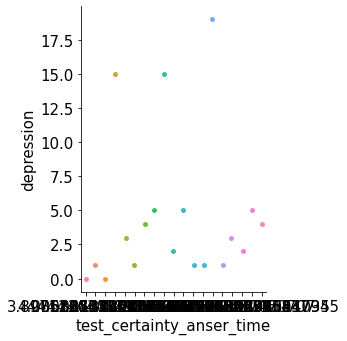

depression


(0.005599720029923594, 0.9818484474958034)

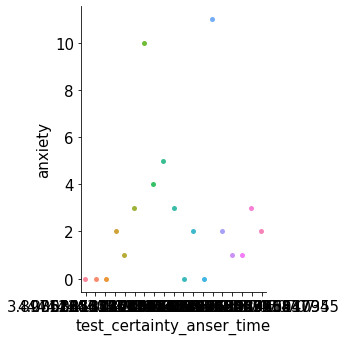

anxiety


(-0.005284057676110385, 0.9828715232897861)

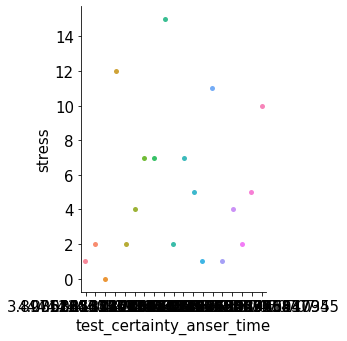

stress


(0.11516647762591449, 0.6387220903589838)

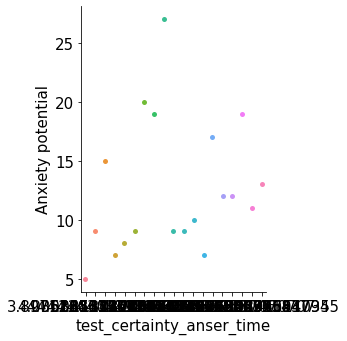

Anxiety potential


(0.13985118452768208, 0.5679788531302835)

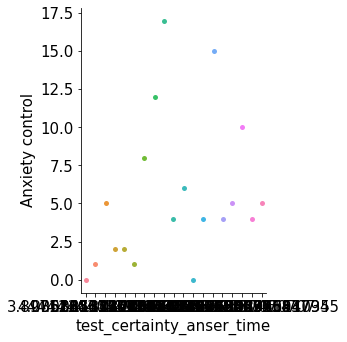

Anxiety control


(0.1407866636780615, 0.5653664320561899)

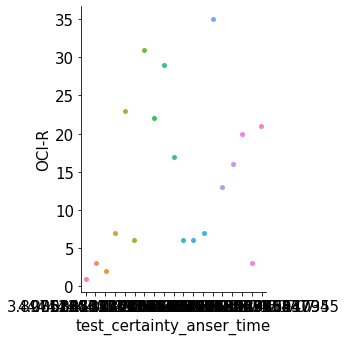

OCI-R


(0.14025364124967885, 0.5668543085890347)

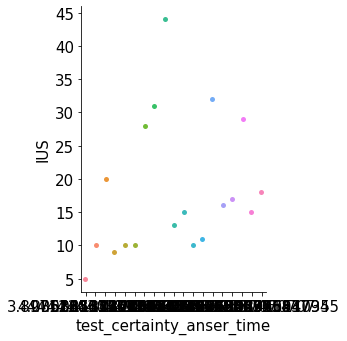

IUS


(0.14469192454304045, 0.554517697993006)

In [28]:
dfs1_time1 = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
dfs1_time1.columns = dfs1_time1.columns.droplevel(level=[0])
def corraltion1(data, name):
  path_f = path + "/inhibitory_control&uncertainty&check_score.xlsx"
  QR_score = pd.concat([pd.read_excel(path_f, sheet_name='Sheet0',na_values="").fillna(value = 0)])

  for i in [52, 20, 41]:
    QR_score = QR_score.drop(QR_score[QR_score['participant'] == i].index)
  QR_score = QR_score.sort_values(by=['participant'], ignore_index=True)
  for i in ['depression', 'anxiety', 'stress', 'Anxiety potential',
            'Anxiety control', 'OCI-R', 'IUS',]:
      test_value = i
      a = pd.DataFrame(QR_score[test_value]).merge(data, left_index=True, right_index=True)
      sn.catplot(data=a,
                x=name, y=test_value)
      # sn.regplot(data=a, ci=None,
      #           x='uncertanty', y=test_value)
      plt.show()
      print(i)
      display(pearsonr(a[test_value], a[name]))
corraltion1(dfs1_time1, 'test_certainty_anser_time')
      

##corraltion RT to true & rare to OCI (IUS)

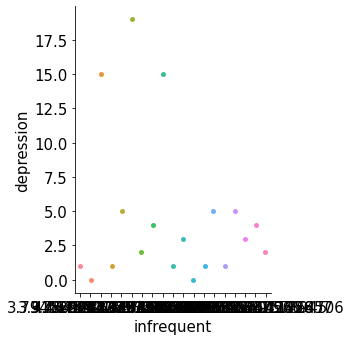

depression


(-0.2032084665661868, 0.4040615343071918)

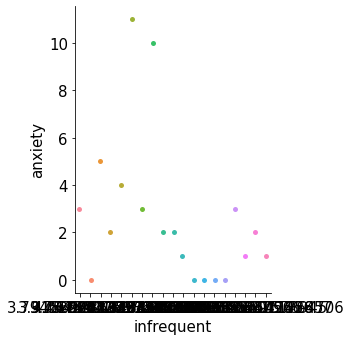

anxiety


(-0.33651067120806316, 0.15891887250018588)

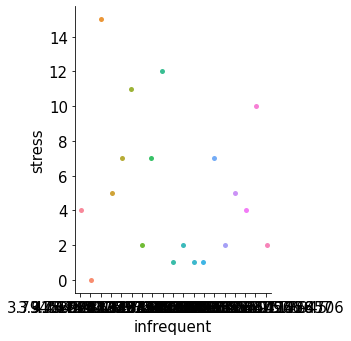

stress


(-0.18591369728681797, 0.44603379352817385)

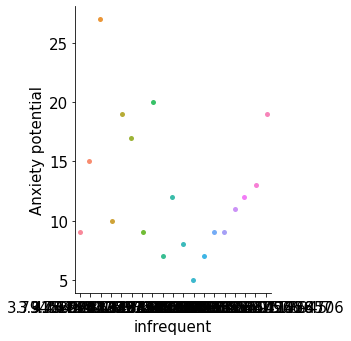

Anxiety potential


(-0.15916592507396732, 0.5151387351853514)

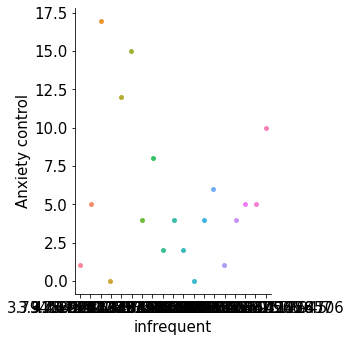

Anxiety control


(-0.13481408586293364, 0.5821347771752832)

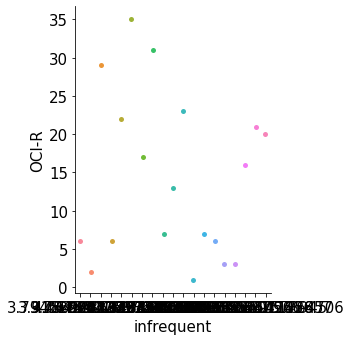

OCI-R


(-0.0518916374113025, 0.8329060253081425)

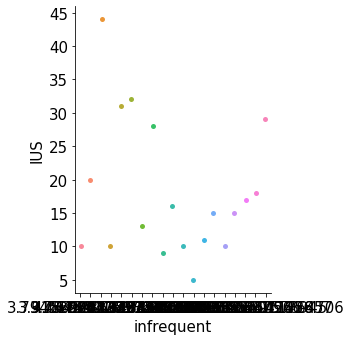

IUS


(-0.15253021474391745, 0.5330271111990716)

In [29]:
x = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
x.columns = x.columns.droplevel(level=[0, 1])
x.drop('widespread', inplace=True, axis=1)
corraltion1(x, 'infrequent')

## corraltion for RT to true & common 

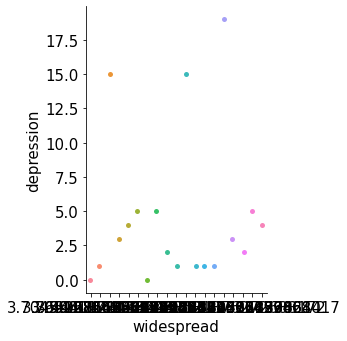

depression


(0.06484203793452832, 0.791988833211903)

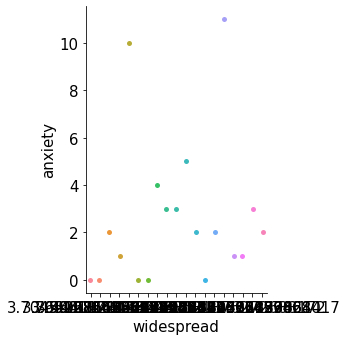

anxiety


(0.09743947852105128, 0.6914846943810347)

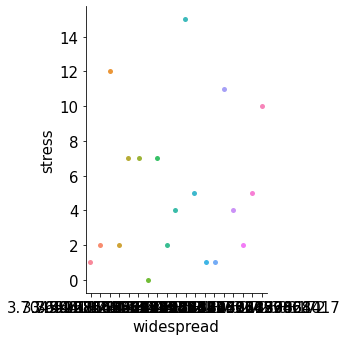

stress


(0.18855646039074941, 0.43947836269006996)

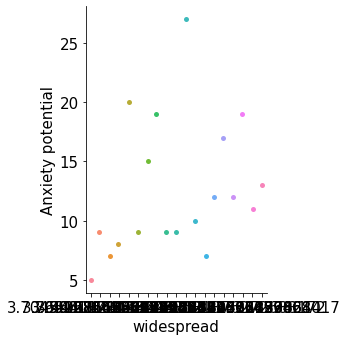

Anxiety potential


(0.2200993980249572, 0.36523579586248267)

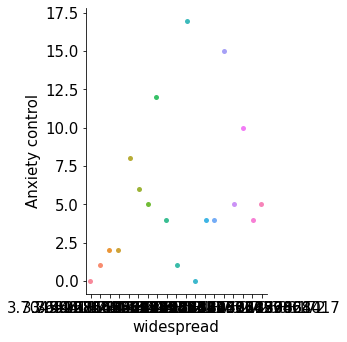

Anxiety control


(0.21112143735294103, 0.3856014109099165)

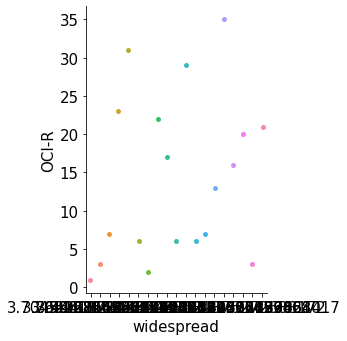

OCI-R


(0.1861479795922924, 0.4454506163997884)

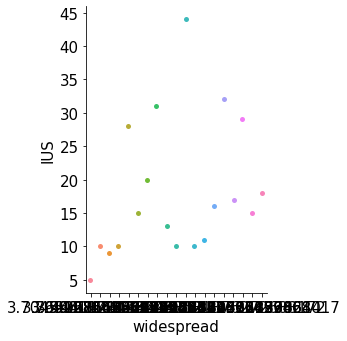

IUS


(0.22272428412329362, 0.3593991179984609)

In [30]:
x = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[common], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
x.columns = x.columns.droplevel(level=[0, 1])
x.drop('infrequent', inplace=True, axis=1)
corraltion1(x, 'widespread')

## corraltion for RT for stroop_0 - stroop_1

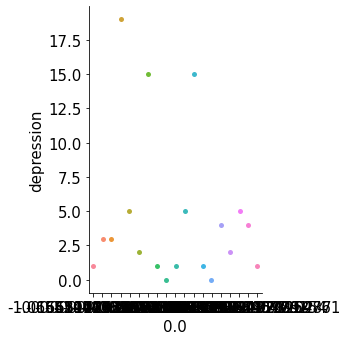

depression


(-0.15674185381762662, 0.5216404714200754)

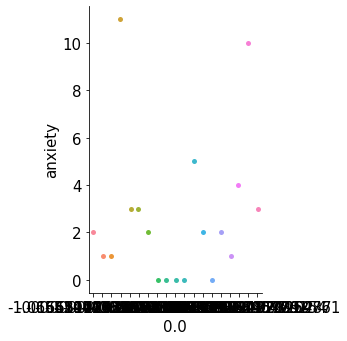

anxiety


(0.16248630104596098, 0.5062955191500994)

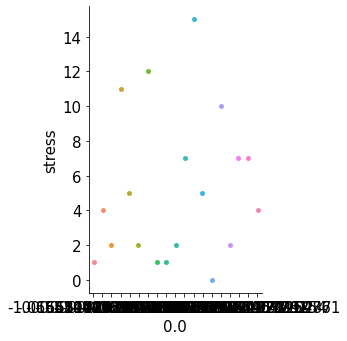

stress


(0.1423788486196144, 0.560932201684663)

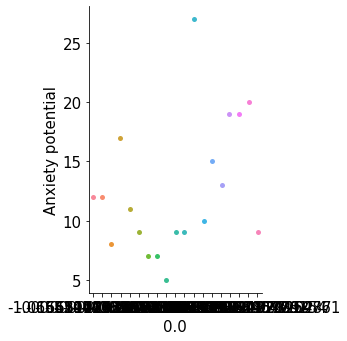

Anxiety potential


(0.3551223298052234, 0.13570278174305153)

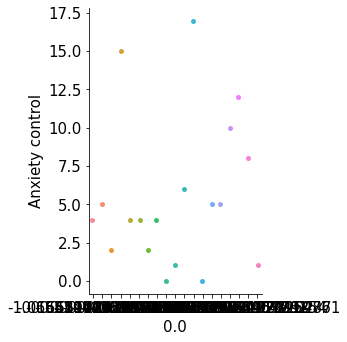

Anxiety control


(0.1343714321783373, 0.5833858988297405)

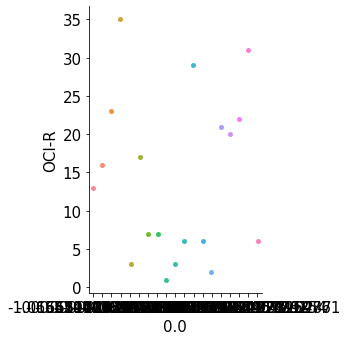

OCI-R


(0.0776980399437025, 0.7518782982547093)

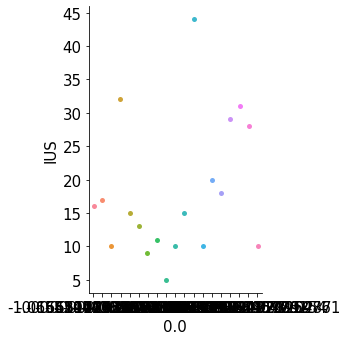

IUS


(0.2607959027372691, 0.28085120675984976)

In [31]:
x = dfs1[(dfs1["test_certainty_anser_currect"] == True)].pivot_table(index=["participant"], 
                                columns=[congruent], values=["test_certainty_anser_time"],
                                aggfunc=[np.mean])
x.columns = x.columns.droplevel(level=[0, 1])
x[0.0] = x[0.0] - x[1.0]
x.drop(1.0, inplace=True, axis=1)
corraltion1(x, 0.0)

# part 2.1

## accurracy as function of common - data

In [32]:
display(dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                                  columns=[common, congruent],values=[], aggfunc=[len]))


len                       
common      infrequent       widespread      
congruent            0     1          0     1
participant                                  
12                 7.0   4.0       40.0  31.0
13                16.0  10.0       39.0  40.0
15                14.0  14.0       28.0  30.0
16                16.0  16.0       39.0  31.0
17                 9.0  13.0       38.0  33.0
18                12.0  13.0       23.0  29.0
19                15.0  17.0       32.0  35.0
21                 7.0   5.0       31.0  27.0
22                 7.0   4.0       37.0  35.0
23                 4.0   4.0       28.0  24.0
24                17.0  19.0       39.0  41.0
25                14.0   8.0       25.0  24.0
26                17.0  19.0       33.0  22.0
27                 2.0   6.0       33.0  27.0
28                 1.0   2.0       37.0  34.0
29                 4.0   7.0       17.0  18.0
30                 4.0   2.0       30.0  26.0
31                14.0  16.0       23.0  28.0
32                 8.0  12.0       43.0  27.0
36                12.0  12.0       21.0  27.0
37                 8.0   5.0       43.0  34.0
38                 6.0  11.0       25.0  20.0
39                14.0  18.0       35.0  43.0
40                 7.0  13.0       19.0  21.0
43                10.0   9.0       25.0  33.0
44                 2.0   6.0       33.0  32.0
45                 8.0   6.0       36.0  24.0
46                 5.0   NaN       44.0  29.0
47                10.0  16.0       24.0  34.0
48                 3.0   5.0       25.0  20.0
49                 2.0   4.0       32.0  27.0
50                 9.0   8.0       36.0  38.0
51                 6.0  13.0       30.0  29.0

## error as function of common

for 36: infre, 0 : 6,  infre, 1 : 6, wides, 0: 51, wides, 1 : 45


congruent  common    
0          infrequent     6.0
           widespread    51.0
1          infrequent     6.0
           widespread    45.0
Name: 36, dtype: float64

for 36: mean: 27 , std: 24.37
mean: 27.0 std: 24.372115213907882


mean       std
congruent common                         
0         infrequent   8.580645  4.470453
          widespread  37.090909  5.708347
1         infrequent   8.870968  4.944640
          widespread  41.515152  4.777036

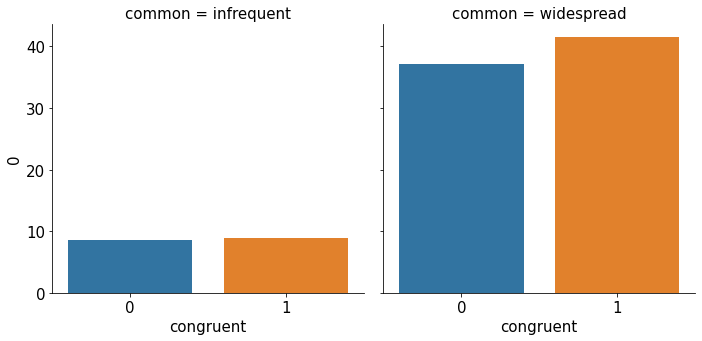

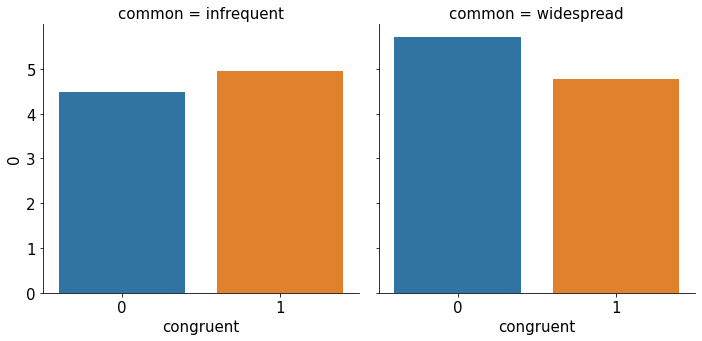

In [33]:
dfs2_1_accurcy = dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_1_accurcy.columns = dfs2_1_accurcy.columns.droplevel([0, 3])

print("for 36: infre, 0 : 6,  infre, 1 : 6, wides, 0: 51, wides, 1 : 45")
display(dfs2_1_accurcy.loc[36.0])
print("for 36: mean: 27 , std: 24.37")
print("mean: " + str(dfs2_1_accurcy.loc[36.0].mean()), "std: " + str(dfs2_1_accurcy.loc[36.0].std()))

display(pd.DataFrame({"mean":dfs2_1_accurcy.mean(), "std": dfs2_1_accurcy.std()}))
sn.catplot(kind='bar', data=dfs2_1_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)
sn.catplot(kind='bar', data=dfs2_1_accurcy.std().reset_index(),
           col="common", x='congruent', y=0)

## time as fonction of common & stroop

for 36: infre, 0 : 2.02,  infre, 1 : 1.81, wides, 0: 1.97, wides, 1 : 2.00


congruent  common    
0          infrequent    1.730970
           widespread    1.852023
1          infrequent    1.780083
           widespread    2.110065
Name: 36, dtype: float64

mean       std
congruent common                        
0         infrequent  1.672471  0.421040
          widespread  1.529794  0.247131
1         infrequent  1.752035  0.520598
          widespread  1.566131  0.244226

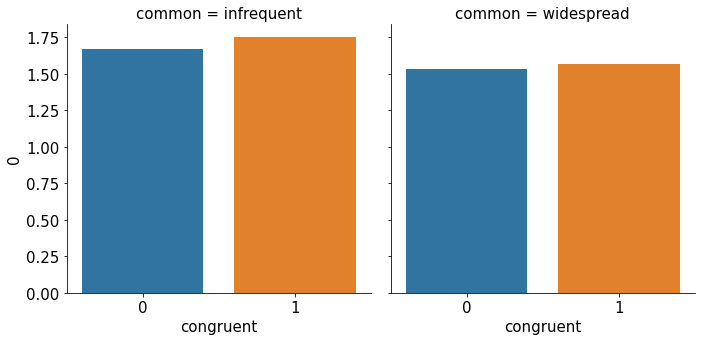

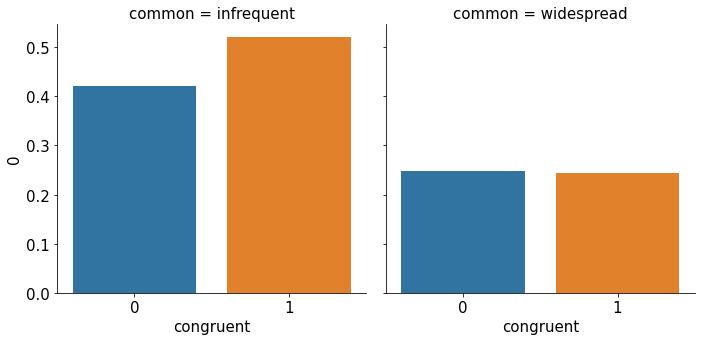

In [34]:
dfs2_1_time = (dfs2_1[dfs2_1["test_uncertainty_anser_currect"] == True]).pivot_table(index=["participant"], 
                                columns=[congruent, common], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean])
dfs2_1_time.columns = dfs2_1_time.columns.droplevel(level=[0,1])


print("for 36: infre, 0 : 2.02,  infre, 1 : 1.81, wides, 0: 1.97, wides, 1 : 2.00")
display(dfs2_1_time.loc[36.0])


dfs2_1_time_mean = pd.DataFrame({"mean": dfs2_1_time.mean(), "std": dfs2_1_time.std()})
sn.catplot(kind='bar', data=dfs2_1_time.mean().reset_index(),
           col="common", x='congruent', y=0)
sn.catplot(kind='bar', data=dfs2_1_time.std().reset_index(),
           col="common", x='congruent', y=0)
dfs2_1_time_mean

##anova kind of error as function of the currect answer

,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty,infrequnce_error
21,כחול,green,x,0,Image_uncertainty_1//image95_alemnt1.jpg,1.jpg,one_up,widespread,widespread,uncertainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
22,כחול,blue,c,1,Image_uncertainty_1//image137_alemnt14.jpg,14.jpg,two_right,widespread,E_infrequent,uncertainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
23,כחול,green,x,0,Image_uncertainty_1//image77_alemnt12.jpg,12.jpg,four_left,widespread,widespread,uncertainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,infreq_answer
24,אדום,red,z,1,Image_uncertainty_1//image171_alemnt10.jpg,10.jpg,two_left,widespread,E_infrequent,uncertainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,true_answer
25,אדום,red,z,1,Image_uncertainty_1//image150_alemnt11.jpg,11.jpg,three_left,widespread,widespread,uncertainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,כחול,red,z,0,Image_uncertainty_1//image10_alemnt-1.jpg,-1.jpg,three_right,infrequent,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.983120,1.981962,2264.426346,None,NaN,true_answer
229,ירוק,red,z,0,Image_uncertainty_1//image26_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,0.851711,0.851090,2271.503936,None,NaN,true_answer
230,כחול,green,x,0,Image_uncertainty_1//image89_alemnt3.jpg,3.jpg,three_up,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.466125,2.465198,2280.679605,None,NaN,wides_answer
231,אדום,red,z,1,Image_uncertainty_1//image177_alemnt8.jpg,8.jpg,four_down,widespread,NaN,uncertainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.683353,1.681726,2288.589761,None,NaN,true_answer


common            infrequent                 widespread              \
infrequnce_error true_answer wides_answer infreq_answer true_answer   
participant                                                           
12                      11.0         27.0          25.0        71.0   
13                      26.0          9.0          50.0        79.0   
15                      28.0          6.0          68.0        58.0   
16                      32.0          7.0          71.0        70.0   
17                      22.0         13.0          40.0        71.0   
18                      25.0          9.0          54.0        52.0   
19                      32.0          5.0          48.0        67.0   
21                      12.0         21.0          27.0        58.0   
22                      11.0         24.0          12.0        72.0   
23                       8.0         26.0          20.0        52.0   
24                      36.0          NaN          67.0        80.0   
25                      22.0         14.0          61.0        49.0   
26                      36.0          NaN          82.0        55.0   
27                       8.0         26.0          20.0        60.0   
28                       3.0         30.0           9.0        71.0   
29                      11.0         15.0          36.0        35.0   
30                       6.0         27.0           7.0        56.0   
31                      30.0          7.0          62.0        51.0   
32                      20.0         19.0          38.0        70.0   
36                      24.0         12.0          66.0        48.0   
37                      13.0         27.0          31.0        77.0   
38                      17.0         15.0          44.0        45.0   
39                      32.0          7.0          59.0        78.0   
40                      20.0          8.0          67.0        40.0   
43                      19.0         18.0          39.0        58.0   
44                       8.0         32.0          33.0        65.0   
45                      14.0         13.0          29.0        60.0   
46                       5.0         31.0          10.0        73.0   
47                      26.0          5.0          55.0        58.0   
48                       8.0         29.0          37.0        45.0   
49                       6.0         26.0          17.0        59.0   
50                      17.0         20.0          48.0        74.0   
51                      19.0         13.0          51.0        59.0   

common                         
infrequnce_error wides_answer  
participant                    
12                       52.0  
13                       25.0  
15                       10.0  
16                       15.0  
17                       29.0  
18                       23.0  
19                       21.0  
21                       60.0  
22                       61.0  
23                       64.0  
24                        4.0  
25                       30.0  
26                       12.0  
27                       51.0  
28                       65.0  
29                       31.0  
30                       71.0  
31                       20.0  
32                       40.0  
36                       30.0  
37                       49.0  
38                       28.0  
39                       15.0  
40                       17.0  
43                       52.0  
44                       50.0  
45                       40.0  
46                       68.0  
47                       21.0  
48                       56.0  
49                       52.0  
50                       31.0  
51                       18.0

,"(participant, )",common,infrequnce_error,value
0,12,infrequent,true_answer,11.0
1,13,infrequent,true_answer,26.0
2,15,infrequent,true_answer,28.0
3,16,infrequent,true_answer,32.0
4,17,infrequent,true_answer,22.0
...,...,...,...,...
160,47,widespread,wides_answer,21.0
161,48,widespread,wides_answer,56.0
162,49,widespread,wides_answer,52.0
163,50,widespread,wides_answer,31.0


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,40640.605591,1,30,40640.605591,10612.812580,8.152826e-40,8.152826e-40,0.575960,1.000000
1,infrequnce_error,5513.517419,2,60,2756.758710,4.812700,1.152143e-02,2.920041e-02,0.155598,0.593479
2,common * infrequnce_error,-5313.839140,2,60,-2656.919570,25.544883,9.425753e-09,9.425753e-09,-0.215948,1.000000


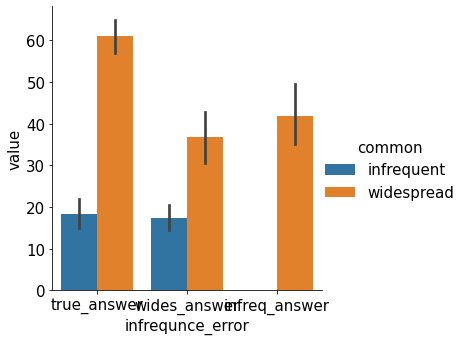

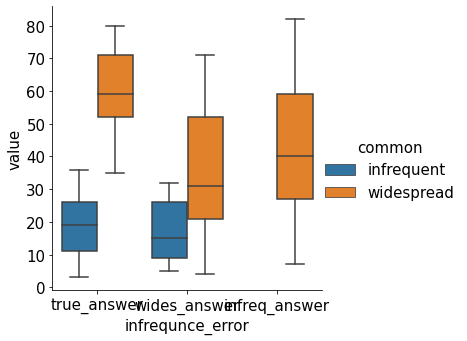

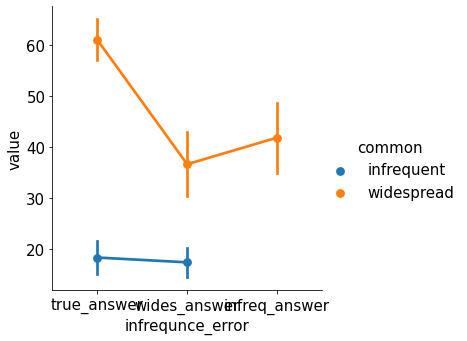

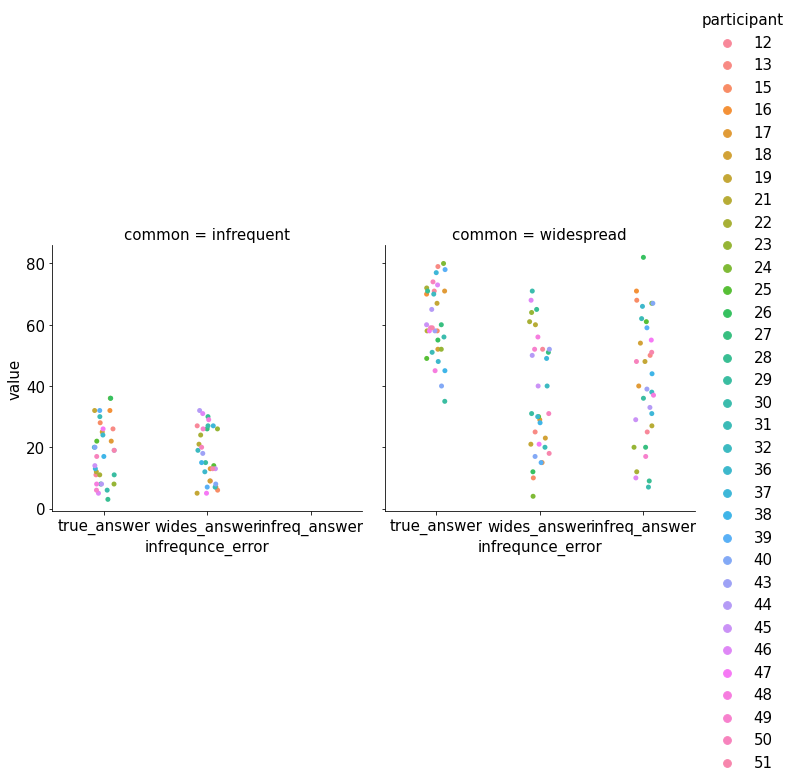

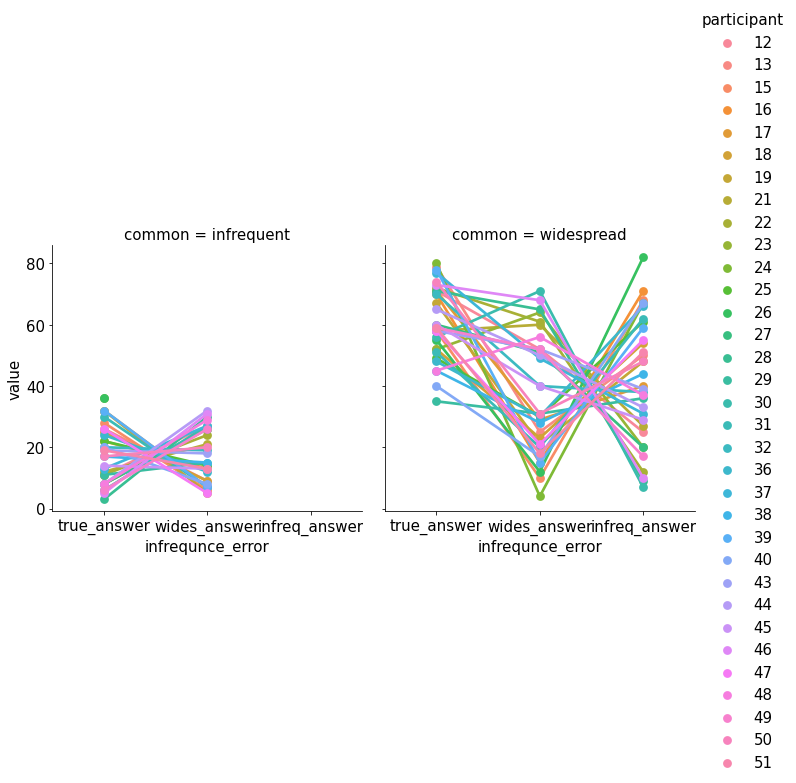

In [35]:
dfs2_1[infrequnce_error] = np.select([(dfs2_1[experiment] == "uncertainty") &
                                        (dfs2_1[click_name] == "three_right")], ["infreq_answer"], default="wides_answer")
dfs2_1.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
display(dfs2_1)
#dfs2_1[infrequnce_error] = np.where(dfs2_1["test_uncertainty_anser_currect"] == True, "true_answer", dfs2_1[infrequnce_error])
dfs2_1_accurcy = dfs2_1.pivot_table(index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len])
dfs2_1_accurcy.columns = dfs2_1_accurcy.columns.droplevel(level=[0])
'''
this is a % of error
'''
# x = dfs2_1.pivot_table(index=["participant"], values=[],
#                                 columns=[common],
#                                 aggfunc=[len]).fillna(0)
# x.columns = x.columns.droplevel(level=[0])
# dfs1_accurcy_div = dfs2_1_accurcy / x 
# display(x)
display(dfs2_1_accurcy)
'''
end
'''
dfs2_1_accurcy = dfs2_1_accurcy.reset_index()
dfs2_1_accurcy_melt = pd.melt(dfs2_1_accurcy, id_vars=[dfs2_1_accurcy.columns[0]],
              value_vars=[dfs2_1_accurcy.columns[i] for i in range(1,len(dfs2_1_accurcy.columns))])
display(dfs2_1_accurcy_melt)
dfs2_1_accurcy_melt = dfs2_1_accurcy_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'infrequnce_error'], data=dfs2_1_accurcy_melt, subject="participant",
             detailed=True))
anovagraphs(dfs2_1_accurcy_melt, x_val=infrequnce_error)


## anova 3-way kind of error as function of currect answer, common & stroop 

In [36]:
dfs2_1_accurcy_3_way = dfs2_1.pivot_table(
                                index=["participant"], 
                                columns=[congruent, common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
dfs2_1_accurcy_3_way.columns = dfs2_1_accurcy_3_way.columns.droplevel(level=[0])

mean = dfs2_1.pivot_table(index=["participant"],columns=infrequnce_error,aggfunc=[len], values=[])
mean.columns = mean.columns.droplevel(level=[0])
print(mean.mean())
print(mean.std())
display(ttest_1samp(mean, 6.6))
res = stat()
res.ttest(df=mean, test_type=1, mu=6.6, res='true_answer')
print(res.summary)



infreq_answer_zero_row = pd.DataFrame([{participant:i,congruent:c, common:'infrequent',
                                        infrequnce_error:'infreq_answer', 'value':0} 
                                       for i in dfs2_1_accurcy_3_way.index for c in [0, 1]])
dfs2_1_accurcy_3_way = dfs2_1_accurcy_3_way.reset_index()

len_of_answer_common = dfs2_1.pivot_table(index=["participant"], 
                                columns=[congruent, common], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
len_of_answer_common.columns = len_of_answer_common.columns.droplevel(level=[0])

x = dfs2_1_accurcy_3_way
dfs2_1_accurcy_3_way_copy_without_precent = dfs2_1_accurcy_3_way.copy()
s1 = pd.DataFrame(x[(0, 'widespread', 'true_answer')])
x[(0, 'widespread', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "widespread")]).values)
s2 = pd.DataFrame(x[(1, 'widespread', 'true_answer')])
x[(1, 'widespread',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "widespread")]).values)
s1 = pd.DataFrame(x[(0, 'infrequent', 'true_answer')])
x[(0, 'infrequent', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values)
s2 =pd.DataFrame(x[(1, 'infrequent', 'true_answer')])
x[(1, 'infrequent',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "infrequent")]).values)

display((dfs2_1_accurcy_3_way.xs(('infreq_answer'), level=infrequnce_error, axis=1)))
display((dfs2_1_accurcy_3_way.xs(('wides_answer'), level=infrequnce_error, axis=1)))

dfs2_1_accurcy_melt_3_way = pd.melt(dfs2_1_accurcy_3_way, id_vars=[dfs2_1_accurcy_3_way.columns[0]],
              value_vars=[dfs2_1_accurcy_3_way.columns[i] for i in range(1, len(dfs2_1_accurcy_3_way.columns))])
dfs2_1_accurcy_melt_3_way = dfs2_1_accurcy_melt_3_way.rename(columns={("participant", '', ''): "participant"})
dfs2_1_accurcy_melt_3_way = pd.concat([dfs2_1_accurcy_melt_3_way , infreq_answer_zero_row], ignore_index=True)
from statsmodels.stats.anova import AnovaRM

infrequnce_error
infreq_answer    41.909091
true_answer      79.484848
wides_answer     53.090909
dtype: float64
infrequnce_error
infreq_answer    20.411951
true_answer      16.229066
wides_answer     28.356397
dtype: float64


Ttest_1sampResult(statistic=array([ 9.93708483, 25.79887124,  9.41833138]), pvalue=array([2.64508592e-11, 5.50091916e-23, 9.61966423e-11]))


One Sample t-test 

------------------  ------------
Sample size         33
Mean                79.4848
t                   25.7989
Df                  32
P-value (one-tail)   2.75046e-23
P-value (two-tail)   5.50092e-23
Lower 95.0%         73.7303
Upper 95.0%         85.2394
------------------  ------------


congruent,0,1
common,widespread,widespread
0,11,14
1,26,24
2,33,35
3,35,36
4,20,20
5,23,31
6,25,23
7,14,13
8,4,8


congruent          0                     1           
common    infrequent widespread infrequent widespread
0                 12         24         15         28
1                  3         13          6         12
2                  2          8          4          2
3                  3          5          4         10
4                  7         13          6         16
5                  6         14          3          9
6                  2         11          3         10
7                 11         28         10         32
8                  9         28         15         33
9                 12         29         14         35
10                 0          1          0          3
11                 5         16          9         14
12                 0          7          0          5
13                14         24         12         27
14                16         29         14         36
15                 9         16          6         15
16                11         32         16         39
17                 4         10          3         10
18                11         16          8         24
19                 6         20          6         10
20                12         24         15         25
21                11         11          4         17
22                 5         10          2          5
23                 4         10          4          7
24                 9         23          9         29
25                18         23         14         27
26                 5         12          8         28
27                12         28         19         40
28                 2         12          3          9
29                16         26         13         30
30                12         26         14         26
31                 9         16         11         15
32                 8          9          5          9

## step 1: anova for true answer : common & conguent (%)

                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.9055 1.0000 32.0000 0.3484
common            3.6625 1.0000 32.0000 0.0646
congruent:common  3.1944 1.0000 32.0000 0.0834



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,0.277630,1,32,0.277630,3.662508,0.064630,0.064630,0.049209,1.0
1,congruent,0.008850,1,32,0.008850,0.905524,0.348437,0.348437,0.001647,1.0
2,common * congruent,0.025375,1,32,0.025375,3.194438,0.083365,0.083365,0.004708,1.0


Rectangle(xy=(-0.4, 0), width=0.4, height=0.521233, angle=0)
[0.493781812465309, 0.548683846465309]
Rectangle(xy=(0.6, 0), width=0.4, height=0.45724, angle=0)
[0.4269784417117042, 0.48750091771170423]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=0.532586, angle=0)
[0.5034247846808938, 0.5617481486808938]
Rectangle(xy=(1, 0), width=0.4, height=0.413134, angle=0)
[0.3909043407760716, 0.43536434077607167]


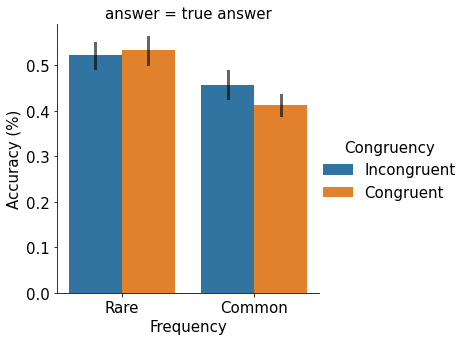

In [37]:
dfs2_1_accurcy_melt_3_way_copy = dfs2_1_accurcy_melt_3_way.copy()
# dfs2_1_accurcy_melt_3_way_copy = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy['participant']!=39)]

# dfs2_1_accurcy_melt_3_way_copy.loc[dfs2_1_accurcy_melt_3_way_copy[common]== "widespread", "value"] = dfs2_1_accurcy_melt_3_way_copy["value"]/ len_of_answer_common["widespread"]
# dfs2_1_accurcy_melt_3_way_copy.loc[dfs2_1_accurcy_melt_3_way_copy[common]== "infrequent", "value"] = dfs2_1_accurcy_melt_3_way_copy["value"]/ len_of_answer_common["infrequent"]
display()
aov = AnovaRM(
    dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
    depvar='value',
    subject="participant",
    within=['congruent', 'common']
    ).fit()
print(aov)
display(pt.rm_anova(dv='value', within=['common', 'congruent'],
  data=dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
  subject="participant", detailed=True))
x=dfs2_1_accurcy_melt_3_way_copy.rename(columns = {'value':'Accuracy (%)'})
x=x.rename(columns = {infrequnce_error:'answer'})
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent'
x=x.rename(columns = {congruent:'Congruency'})
x.loc[x["answer"] == 'true_answer',"answer"] = 'true answer'

x.loc[x["common"] == 'widespread',"common"] = 'Common'
x.loc[x["common"] == 'infrequent', "common"] = 'Rare'

x=x.rename(columns = {common:'Frequency'})

z = sn.catplot(kind='bar', 
           data=x[x['answer'] == 'true answer'], ci=None,
           x='Frequency', col='answer', hue='Congruency', y='Accuracy (%)')

se = [0.027451017, 0.030261238, 0.029161682, 0.02223]
create_se_on_graph(z, se)

## steps 2: t-test for widsp & true answer : conguent (%)

,participant,congruent,common,infrequnce_error,value
99,12,0,widespread,true_answer,0.533333
100,13,0,widespread,true_answer,0.500000
101,15,0,widespread,true_answer,0.405797
102,16,0,widespread,true_answer,0.493671
103,17,0,widespread,true_answer,0.535211
...,...,...,...,...,...
292,47,1,widespread,true_answer,0.459459
293,48,1,widespread,true_answer,0.298507
294,49,1,widespread,true_answer,0.409091
295,50,1,widespread,true_answer,0.513514


                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  8.4047 1.0000 32.0000 0.0067



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,2.89908,32.0,two-sided,0.006709,6.13,0.079475


Int64Index([0, 1], dtype='int64', name='congruent')


Paired t-test 

------------------  -----------
Sample size         33
Difference Mean      0.0441053
t                    2.89908
Df                  32
P-value (one-tail)   0.00335447
P-value (two-tail)   0.00670895
Lower 95.0%          0.0131163
Upper 95.0%          0.0750944
------------------  -----------
Rectangle(xy=(-0.4, 0), width=0.8, height=0.45724, angle=0)
[0.4493951867117042, 0.4650841727117042]
Rectangle(xy=(0.6, 0), width=0.8, height=0.413134, angle=0)
[0.4052943407760716, 0.42097434077607165]


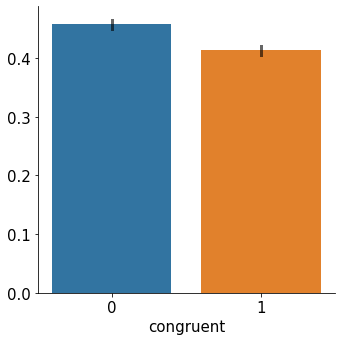

In [38]:
dfs_2_1_true_answer_common_a = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer') &
                              (dfs2_1_accurcy_melt_3_way_copy[common] == 'widespread')]
display(dfs_2_1_true_answer_common_a)
aov = AnovaRM(
    dfs_2_1_true_answer_common_a,
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
print(aov)
display(pt.pairwise_tests(data=dfs_2_1_true_answer_common_a, dv='value', 
                         within=['congruent'], subject="participant", effsize='eta-square'))


dfs_2_1_true_answer_common = dfs_2_1_true_answer_common_a.pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0) 
display(dfs_2_1_true_answer_common.columns)

                              
res = stat()

res.ttest(dfs_2_1_true_answer_common, res=[0,1], test_type=3)                
print(res.summary)
z = sn.catplot(kind='bar', ci=None,
           data= dfs_2_1_true_answer_common)

se = [0.007844493, 0.00784]
create_se_on_graph(z, se)

## step 3: anova for error - widsp : kind of error & stroop

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,161.484848,1,32,161.484848,14.555759,0.000587,0.000587,0.011892,1.0
1,infrequnce_error,224.121212,1,32,224.121212,0.592895,0.446949,0.446949,0.016429,1.0
2,congruent * infrequnce_error,3.030303,1,32,3.030303,0.223191,0.639825,0.639825,0.000226,1.0


                         Anova
                           F Value Num DF  Den DF Pr > F
--------------------------------------------------------
congruent                  14.5558 1.0000 32.0000 0.0006
infrequnce_error            0.5929 1.0000 32.0000 0.4469
congruent:infrequnce_error  0.2232 1.0000 32.0000 0.6398

Rectangle(xy=(-0.4, 0), width=0.4, height=19.697, angle=0)
[17.931546718969695, 21.462392674969696]
Rectangle(xy=(0.6, 0), width=0.4, height=17.3939, angle=0)
[15.573278004939395, 19.214600782939396]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=22.2121, angle=0)
[20.724930985121212, 23.69931143912121]
Rectangle(xy=(1, 0), width=0.4, height=19.303, angle=0)
[17.221240303030307, 21.384820303030303]


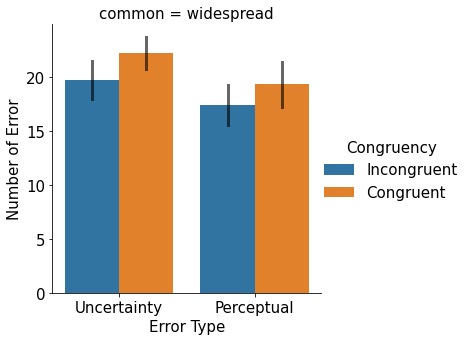

In [39]:
dfs2_1_accurcy_melt_3_way_copy = dfs2_1_accurcy_melt_3_way.copy()
x_2_1 = dfs2_1_accurcy_melt_3_way_copy[(dfs2_1_accurcy_melt_3_way_copy['common'] == "widespread") &
                              (dfs2_1_accurcy_melt_3_way_copy[infrequnce_error] != "true_answer")]
                            
aov = AnovaRM(
    x_2_1,
    depvar='value',
    subject="participant",
    within=['congruent', infrequnce_error]
    ).fit()

display(pt.rm_anova(dv='value', within=['congruent', infrequnce_error],
  data=x_2_1,
  subject="participant", detailed=True))

x=x_2_1.rename(columns = {'value':'Number of Error'})
x=x.rename(columns = {infrequnce_error:'kind of error'})
x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Uncertainty'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Perceptual'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent' 
x=x.rename(columns = {congruent:'Congruency'})
x=x.rename(columns = {"kind of error":'Error Type'})
print(aov)
z = sn.catplot(kind='bar', ci=None,
           data=x,
           
           col='common', x='Error Type', hue='Congruency', y='Number of Error')
se = [1.765422978,1.820661389, 1.487190227, 2.08179]
create_se_on_graph(z, se)

##step 4: ttest for error - widsp & 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  9.8785 1.0000 32.0000 0.0036



,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,eta-square
0,congruent,0,1,True,True,-3.143004,32.0,two-sided,0.003593,10.508,0.014244


-2.515151515151515

4.597018137616574

congruent,0,1
participant,,
12,11.0,14.0
13,26.0,24.0
15,33.0,35.0
16,35.0,36.0
17,20.0,20.0
18,23.0,31.0
19,25.0,23.0
21,14.0,13.0
22,4.0,8.0



Paired t-test 

------------------  -----------
Sample size         33
Difference Mean     -2.51515
t                   -3.143
Df                  32
P-value (one-tail)   0.00179663
P-value (two-tail)   0.00359326
Lower 95.0%         -4.14518
Upper 95.0%         -0.88512
------------------  -----------


,congruent,value
0,0,11.0
1,0,26.0
2,0,33.0
3,0,35.0
4,0,20.0
...,...,...
61,1,31.0
62,1,17.0
63,1,13.0
64,1,21.0


Rectangle(xy=(-0.4, 0), width=0.8, height=19.697, angle=0)
[19.284969696969696, 20.108969696969694]
Rectangle(xy=(0.6, 0), width=0.8, height=22.2121, angle=0)
[21.800121212121212, 22.62412121212121]


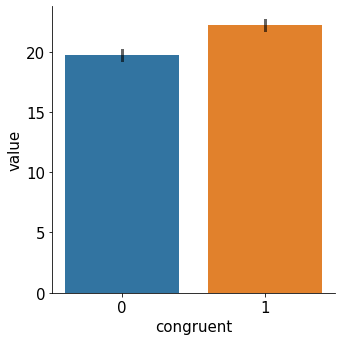

In [40]:
aov = AnovaRM(
    x_2_1[(x_2_1[infrequnce_error] == 'infreq_answer')],
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
print(aov)
# display(x_2_1[(x_2_1[infrequnce_error] == 'infreq_answer')])
display(pt.pairwise_tests(data=x_2_1[(x_2_1[infrequnce_error] == 'infreq_answer')], dv='value', 
                         within=['congruent'], subject="participant", effsize='eta-square'))
x1 = x_2_1[(x_2_1[infrequnce_error] == 'infreq_answer')].pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0) 

res = stat()
res.ttest(x1, res=[0,1], test_type=3)
display((x1[0]-x1[1]).mean()) 
# display((x1[0]-x1[1]).std() / np.sqrt(np.size(x1[0])))  
display((x1[0]-x1[1]).std())  
display(x1)          
print(res.summary)
x1 = pd.melt(x1)
display(x1)
z = sn.catplot(kind='bar', 
           data=x1,
           ci=None,
           x='congruent', y='value')
se = [0.412,0.412]
create_se_on_graph(z, se)


## % of (error say no image) / (say no image) 

Ttest_1sampResult(statistic=-1.02499551584797, pvalue=0.31305167010281815)


Paired t-test 

------------------  ----------
Sample size         33
Difference Mean     -0.0331259
t                   -1.025
Df                  32
P-value (one-tail)   0.156526
P-value (two-tail)   0.313052
Lower 95.0%         -0.0989557
Upper 95.0%          0.0327039
------------------  ----------


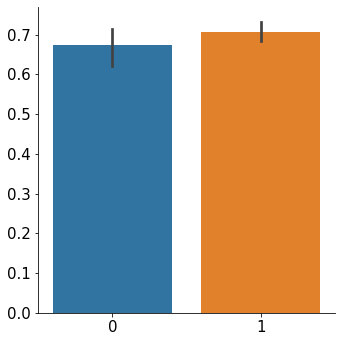

In [41]:
p = dfs2_1_accurcy_3_way_copy_without_precent
true_answer_0 = pd.DataFrame(p[(0, 'infrequent', 'true_answer')])
error_0 = pd.DataFrame(p[(0, 'widespread', 'infreq_answer')])
stroop_0 = (error_0.values / (error_0.values + true_answer_0.values)).reshape(1, -1).flatten()

true_answer_1 = pd.DataFrame(p[(1, 'infrequent', 'true_answer')])
error_1 = pd.DataFrame(p[(1, 'widespread', 'infreq_answer')])
stroop_1 = (error_1.values / (error_1.values + true_answer_1.values)).reshape(1, -1).flatten()

present_of_uncertanty = pd.DataFrame([stroop_0, stroop_1]).T
present_of_uncertanty

uncertanty_all = pd.DataFrame(((error_1.values+error_0.values) / (error_1.values + true_answer_1.values +
                                                error_0.values + true_answer_0.values)).reshape(1, -1).flatten())
#uncertanty_all = pd.DataFrame((error_1.values + true_answer_1.values + error_0.values + true_answer_0.values).reshape(1, -1).flatten())
uncertanty_all=uncertanty_all.rename(columns = {0:'uncertanty'})
uncertanty_all = pd.DataFrame(p[participant]).merge(uncertanty_all, left_index=True, right_index=True)
res = stat()
res.ttest(present_of_uncertanty, res=[0,1], test_type=3)  
display(ttest_1samp(a=stroop_0-stroop_1, popmean=0) )           
print(res.summary)
sn.catplot(kind='bar',
           data=present_of_uncertanty)

corraltion 

## coraltion with question

In [42]:
def corraltion(data, name):
  path_f = path + "/inhibitory_control&uncertainty&check_score.xlsx"
  QR_score = pd.concat([pd.read_excel(path_f, sheet_name='Sheet0',na_values="").fillna(value = 0)])

  for i in [52, 20, 41]:
    QR_score = QR_score.drop(QR_score[QR_score['participant'] == i].index)
  QR_score = QR_score.sort_values(by=['participant'], ignore_index=True)
  # for i in ['accumulation', 'Obsessiveness', 'checking', 'neutralize',
  #           'order', 'depression', 'anxiety', 'stress', 'Anxiety potential',
  #           'Anxiety control', 'OCI-R', 'IUS', 'washing']:
  for i in ['IUS']:
      display(data)
      test_value = i
      a = pd.DataFrame(QR_score[test_value]).merge(data, left_index=True, right_index=True)
      # a=a.rename(columns = {'depression':'Depression'})
      # a=a.rename(columns = {'infreq_answer':'Accepting Uncertainty'})
      # name = 'Accepting Uncertainty'
      # test_value = 'Depression'
      sn.catplot(data=a,
                 x=name, y=test_value)
      sn.lmplot(data=a, ci = None,
                 x=name, y=test_value)
      #sn.regplot(data=a, ci=None,
      #          x='Uncertainty Propagation', y=test_value)
    
      plt.show()
      print(i)
      display(pearsonr(a[test_value], a[name]))
# corraltion(uncertanty_all, 'uncertanty' )   
# display(uncertanty_all)

## corraltion - for time - say no image 

infrequnce_error,infreq_answer
participant,
12,2.063599
13,1.661820
15,1.341428
16,1.660791
17,1.988480
18,1.962298
19,1.635532
21,1.828229
22,1.693163


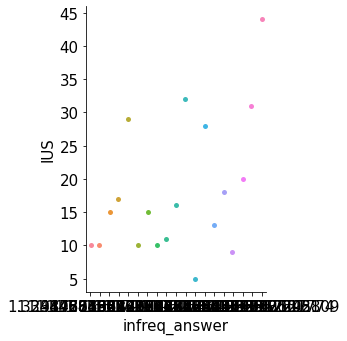

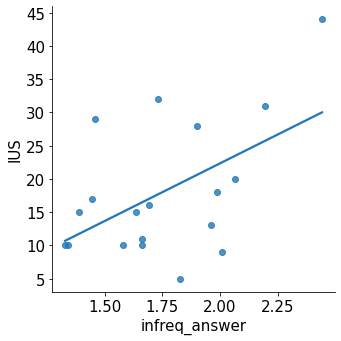

IUS


(0.5204191110647401, 0.02235212052462629)

In [43]:
dfs2_1_copy = dfs2_1.copy()
dfs2_1_copy[infrequnce_error] = np.select([(dfs2_1_copy[experiment] == "uncertainty") &
                                        (dfs2_1_copy[click_name] == "three_right")], ["infreq_answer"], default="wides_answer")
########### for test only error uncertanty, take the next line
# dfs2_1_copy.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_1_time_uncertanty = (dfs2_1_copy.pivot_table(index=["participant"], 
                                columns=[infrequnce_error], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean]))
dfs2_1_time_uncertanty.columns = dfs2_1_time_uncertanty.columns.droplevel(level=[0, 1])
########### for test only error uncertanty, take the next line
# dfs2_1_time_uncertanty.drop('true_answer', inplace=True, axis=1)
dfs2_1_time_uncertanty.drop('wides_answer', inplace=True, axis=1)
dfs2_1_time_uncertanty
corraltion(dfs2_1_time_uncertanty, 'infreq_answer')  

## corraltion - for time - all kind error

infrequnce_error,error
participant,
12,2.092767
13,1.686188
15,1.403536
16,1.622175
17,2.000139
18,1.852565
19,1.787119
21,2.005741
22,1.533887


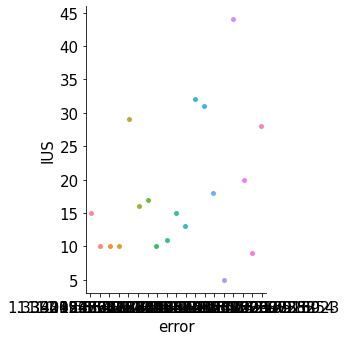

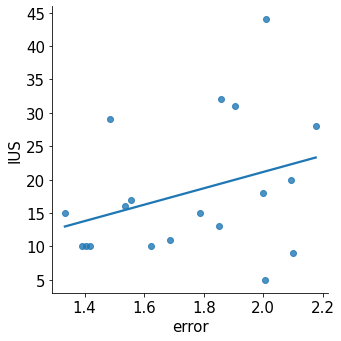

IUS


(0.33171873410167696, 0.16531241464954585)

In [44]:
dfs2_1_copy[infrequnce_error] = np.select([(dfs2_1_copy[experiment] == "uncertainty") &
                                        (dfs2_1_copy[click_name] == "three_right")], ["error"], default="error")
dfs2_1_copy.loc[dfs2_1["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_1_time_uncertanty = (dfs2_1_copy.pivot_table(index=["participant"], 
                                columns=[infrequnce_error], values=["test_mouse_anser_rual.time"],
                                aggfunc=[np.mean]))
dfs2_1_time_uncertanty.columns = dfs2_1_time_uncertanty.columns.droplevel(level=[0, 1])
########### for test only error uncertanty, take the next line
dfs2_1_time_uncertanty.drop('true_answer', inplace=True, axis=1)
dfs2_1_time_uncertanty
corraltion(dfs2_1_time_uncertanty, 'error')  

## corraltion - accurcy - after inhibtion

,uncertanty
0,-0.166667
1,-0.086835
2,-0.012158
3,-0.006033
4,0.083595
5,-0.047403
6,0.050000
7,-0.055556
8,-0.303030
9,-0.083333


,uncertanty
0,-0.166667
1,-0.086835
2,-0.012158
3,-0.006033
4,0.083595
5,-0.047403
6,0.050000
7,-0.055556
8,-0.303030
9,-0.083333


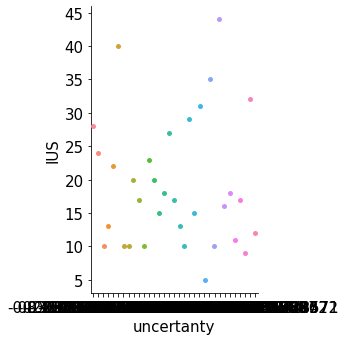

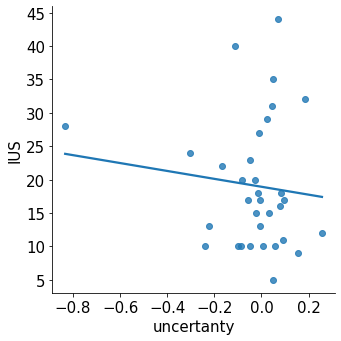

IUS


(-0.11420947346800542, 0.526823715349862)

In [45]:
diffAccurcy = pd.DataFrame(stroop_0 - stroop_1)
diffAccurcy=diffAccurcy.rename(columns = {0:'uncertanty'})
display(diffAccurcy)
corraltion(diffAccurcy, 'uncertanty')                         

# part 2.2

## accuracy as function of common - data

In [46]:
dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == True].pivot_table(index=["participant"], 
                                                  columns=[common, congruent],values=[], aggfunc=[len])

len                   
common      infrequent     widespread    
congruent            0   1          0   1
participant                              
12                   9   8         40  34
13                   8  11         31  37
15                   4   5         32  32
16                   9   9         44  45
17                   6  10         31  32
18                   5   7         28  25
19                   4   9         31  33
21                   4   7         32  40
22                   7   8         37  41
23                   9   7         33  42
24                  10   7         43  49
25                   2   3         24  36
26                  12   4         31  30
27                   5   7         30  38
28                   9   8         43  36
29                   6   5         26  24
30                   4   8         31  32
31                   7   8         26  24
32                   7   9         33  36
36                   9  10         27  31
37                  15  10         47  53
38                   9   5         21  29
39                  10   8         33  44
40                   2   1         31  31
43                   6   4         29  29
44                  10  10         41  51
45                   5   7         51  39
46                  14   4         38  34
47                   9   6         25  33
48                   3   4         35  35
49                   8   5         25  29
50                  10  12         40  31
51                   6   7         18  33

## error as function of common

congruent  common    
0          infrequent    10
           widespread    41
1          infrequent    10
           widespread    37
Name: 36, dtype: int64

mean       std
congruent common                         
0         infrequent   9.090909  2.719876
          widespread  31.212121  7.334668
1         infrequent   9.939394  2.474108
          widespread  32.212121  6.426301

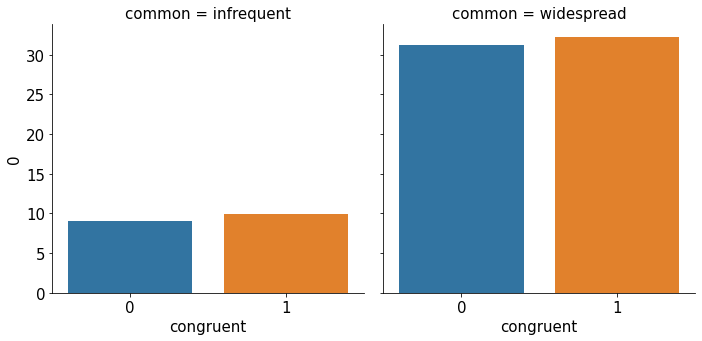

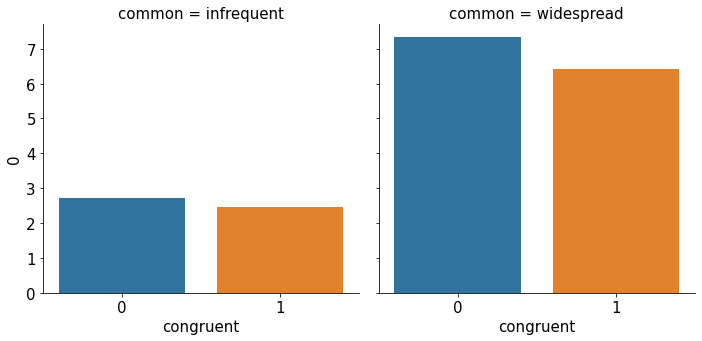

In [47]:
dfs2_2_accurcy = dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[congruent, common, "test_uncertainty_anser_currect"], values=[],
                                aggfunc=[len])
dfs2_2_accurcy.columns = dfs2_2_accurcy.columns.droplevel([0, 3])


display(dfs2_2_accurcy.loc[36.0])


display(pd.DataFrame({"mean":dfs2_2_accurcy.mean(), "std": dfs2_2_accurcy.std()}))
sn.catplot(kind='bar', data=dfs2_2_accurcy.mean().reset_index(),
           col="common", x='congruent', y=0)
sn.catplot(kind='bar', data=dfs2_2_accurcy.std().reset_index(),
           col="common", x='congruent', y=0)

## add infrequnce error to data

In [48]:
def add_error_of_infrequnce(file):
    # file[infrequnce_error] = np.select([(file[experiment] == "certainty") &
    #                                     ((file[click_name] == "two_up")
    #                                      | (file[click_name] == "one_up") | (file[click_name] == "three_up") |
    #                                      (file[click_name] == "four_up") | (file[click_name] == "one_down")
    #                                      | (file[click_name] == "two_down") | (file[click_name] == "three_down"))],
    #                                    ["infreq_answer"], default="wides_answer")
    file[infrequnce_error] = np.select([(file[experiment] == "certainty") &
                                        ((file[click_name] == "two_up") | (file[click_name] == "one_down")
                                         | (file[click_name] == "three_down"))],
                                       ["infreq_answer"], default="wides_answer")
    # file = file[(file[stroop_corr] == 1) & (file[infrequnce_error] == True)] \
    #     .pivot_table(index=["participant"], columns=[congruent], values=[], aggfunc=[len])
    return file
dfs2_2 = add_error_of_infrequnce(dfs2_2)
display(dfs2_2)


,word,letterColor,corrAns,congruent,imageTrain,true_shaps,corrAnsRual,common,common_new,experiment,...,date,expName,psychopyVersion,frameRate,test_certainty_anser_time,finalClickTime,text_5.started,text_5.stopped,certainty,infrequnce_error
221,ירוק,blue,c,0,Image_uncertainty_2//image39_alemnt10.jpg,10.jpg,two_left,widespread,0,certainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
222,אדום,red,z,1,Image_uncertainty_2//image105_alemnt5.jpg,5.jpg,one_down,infrequent,0,certainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,infreq_answer
223,כחול,blue,c,1,Image_uncertainty_2//image125_alemnt14.jpg,14.jpg,two_right,widespread,0,certainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
224,ירוק,green,x,1,Image_uncertainty_2//image187_alemnt8.jpg,8.jpg,four_down,widespread,0,certainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
225,ירוק,green,x,1,Image_uncertainty_2//image151_alemnt14.jpg,14.jpg,two_right,widespread,0,certainty,...,2021_Nov_23_1013,untitled_2,2020.2.6,60.125928,NaN,NaN,NaN,NaN,NaN,wides_answer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,כחול,blue,c,1,Image_uncertainty_2//image167_alemnt11.jpg,11.jpg,three_left,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.432945,1.432501,4093.819736,None,NaN,infreq_answer
429,כחול,red,z,0,Image_uncertainty_2//image76_alemnt14.jpg,14.jpg,two_right,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.000705,0.999628,4100.880304,None,NaN,wides_answer
430,כחול,red,z,0,Image_uncertainty_2//image58_alemnt13.jpg,13.jpg,one_right,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,2.134903,2.133987,4109.273416,None,NaN,wides_answer
431,ירוק,red,z,0,Image_uncertainty_2//image80_alemnt10.jpg,10.jpg,two_left,widespread,NaN,certainty,...,2022_Jul_19_1932,untitled_2,2020.2.6,60.047293,1.285299,0.000000,4116.917265,None,NaN,wides_answer


##anova kind of error as function of the currect answer

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,common,14839.172414,1,28,14839.172414,487.484899,2.985197e-19,2.985197e-19,0.779453,1.0
1,infrequnce_error,17138.793103,1,28,17138.793103,401.341004,3.882427e-18,3.882427e-18,0.803222,1.0
2,common * infrequnce_error,4468.965517,1,28,4468.965517,184.142288,7.770985e-14,7.770985e-14,0.515587,1.0


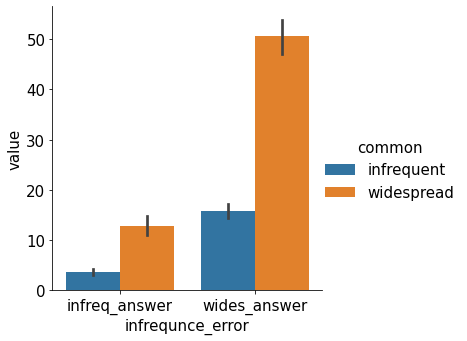

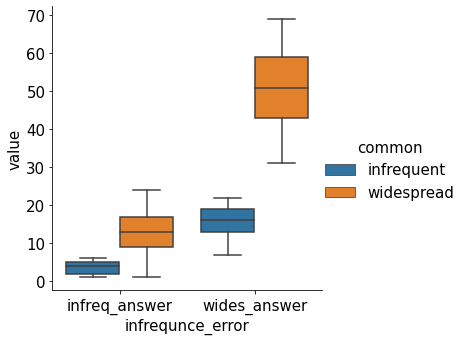

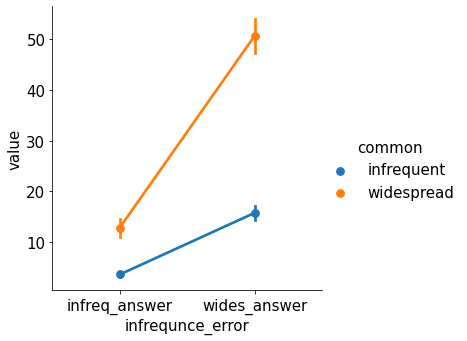

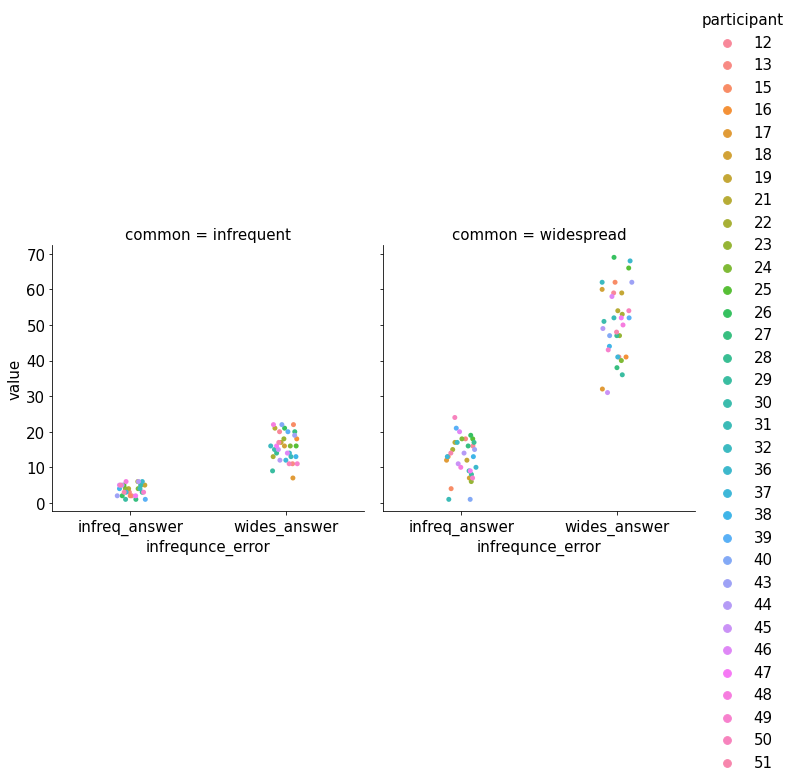

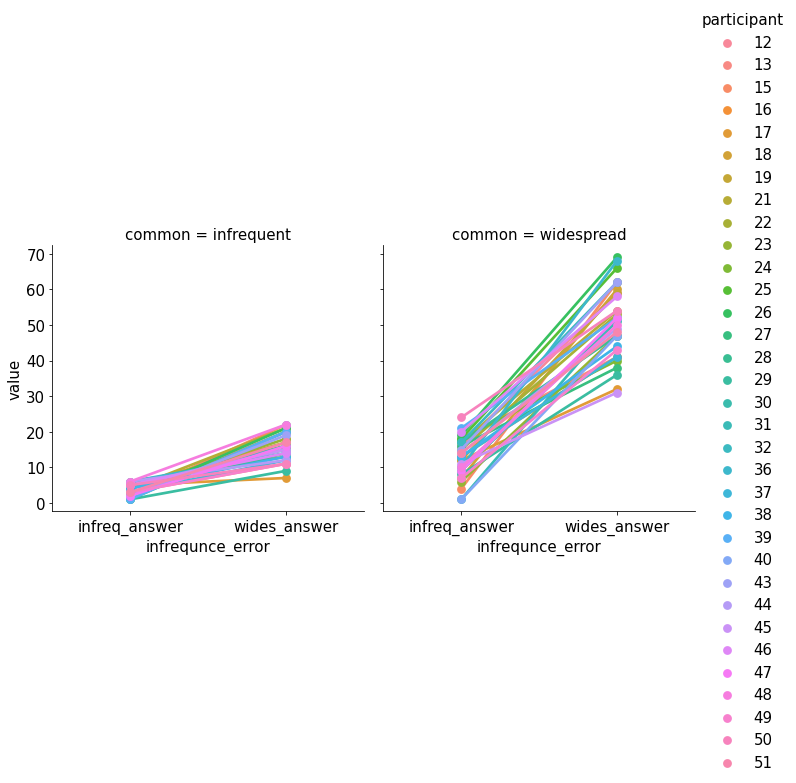

In [49]:
dfs2_2_accurcy = dfs2_2[dfs2_2["test_uncertainty_anser_currect"] == False].pivot_table(index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len])
dfs2_2_accurcy.columns = dfs2_2_accurcy.columns.droplevel(level=[0])                          
dfs2_2_accurcy = dfs2_2_accurcy.reset_index()
dfs2_2_accurcy_melt = pd.melt(dfs2_2_accurcy, id_vars=[dfs2_2_accurcy.columns[0]],
              value_vars=[dfs2_2_accurcy.columns[i] for i in range(1,len(dfs2_2_accurcy.columns))])
dfs2_2_accurcy_melt = dfs2_2_accurcy_melt.rename(columns={("participant", ''): "participant"})
display(pt.rm_anova(dv='value', within=['common', 'infrequnce_error'], data=dfs2_2_accurcy_melt, subject="participant",
             detailed=True))

anovagraphs(dfs2_2_accurcy_melt, x_val=infrequnce_error)

## anova 3-way

In [50]:
dfs2_2.loc[dfs2_2["test_uncertainty_anser_currect"] == True, infrequnce_error] = "true_answer"
dfs2_2_accurcy_3_way = dfs2_2.pivot_table(
                                index=["participant"], 
                                columns=[congruent, common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
u = dfs2_2.pivot_table(
                                index=["participant"], 
                                columns=[common, infrequnce_error], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)

u.columns = u.columns.droplevel(level=[0])
u = u.reset_index()


mean = dfs2_2.pivot_table(index=["participant"],columns=infrequnce_error,aggfunc=[len], values=[])
mean.columns = mean.columns.droplevel(level=[0])
print(mean.mean())
print(mean.std())
display(ttest_1samp(mean, 6.6))
res = stat()
res.ttest(df=mean, test_type=1, mu=7.1, res='true_answer')
print(res.summary)

dfs2_2_accurcy_3_way.columns = dfs2_2_accurcy_3_way.columns.droplevel(level=[0])
dfs2_2_accurcy_3_way = dfs2_2_accurcy_3_way.reset_index()
#display(dfs2_2_accurcy_3_way)
len_of_answer_common = dfs2_2.pivot_table(index=["participant"], 
                                columns=[congruent, common], values=[],
                                aggfunc=[len], fill_value=0).fillna(0)
len_of_answer_common.columns = len_of_answer_common.columns.droplevel(level=[0])


s1 = pd.DataFrame(u[('widespread', 'true_answer')])
u[('widespread', 'true_answer')]  = (s1.values / (pd.DataFrame(len_of_answer_common[(0, "widespread")]).values + pd.DataFrame(len_of_answer_common[(1, "widespread")]).values))
s1 = pd.DataFrame(u[('infrequent', 'true_answer')])
u[('infrequent', 'true_answer')]  = (s1.values / (pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values + pd.DataFrame(len_of_answer_common[(1, "widespread")]).values))
print(u.xs(('true_answer'), level=infrequnce_error, axis=1).mean(axis=0))
print(u.xs(('true_answer'), level=infrequnce_error, axis=1).std(axis=0))
display(u.xs(('true_answer'), level=infrequnce_error, axis=1))




dfs2_2_accurcy_3_way_copy_without_precent = dfs2_2_accurcy_3_way.copy()
x = dfs2_2_accurcy_3_way
s1 = pd.DataFrame(x[(0, 'widespread', 'true_answer')])
x[(0, 'widespread', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "widespread")]).values)
s2 = pd.DataFrame(x[(1, 'widespread', 'true_answer')])
x[(1, 'widespread',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "widespread")]).values)
s1 = pd.DataFrame(x[(0, 'infrequent', 'true_answer')])
x[(0, 'infrequent', 'true_answer')]  = (s1.values / pd.DataFrame(len_of_answer_common[(0, "infrequent")]).values)
s2 =pd.DataFrame(x[(1, 'infrequent', 'true_answer')])
x[(1, 'infrequent',   'true_answer')] = (s2.values / pd.DataFrame(len_of_answer_common[(1, "infrequent")]).values)

#display((dfs2_2_accurcy_3_way.xs(('true_answer'), level=infrequnce_error, axis=1)))

#display((dfs2_2_accurcy_3_way.xs(('infreq_answer'), level=infrequnce_error, axis=1)))
#display((dfs2_2_accurcy_3_way.xs(('wides_answer'), level=infrequnce_error, axis=1)))
#display(dfs2_2_accurcy_3_way)

# find mean
#u = dfs2_2_accurcy_3_way.xs(('true_answer'), level=infrequnce_error, axis=1)

# display(u[(1, "infreq_answer")] + u[(0, "infreq_answer")])


dfs2_2_accurcy_melt_3_way = pd.melt(dfs2_2_accurcy_3_way, id_vars=[dfs2_2_accurcy_3_way.columns[0]],
              value_vars=[dfs2_2_accurcy_3_way.columns[i] for i in range(1, len(dfs2_2_accurcy_3_way.columns))])

dfs2_2_accurcy_melt_3_way = dfs2_2_accurcy_melt_3_way.rename(columns={("participant", '', ''): "participant"})
dfs2_2_accurcy_melt_3_way = pd.concat([dfs2_2_accurcy_melt_3_way], ignore_index=True)

# dfs2_2_accurcy_melt_3_way.loc[dfs2_2_accurcy_melt_3_way[common]== "infrequent", "value"] = dfs2_2_accurcy_melt_3_way["value"]/ 20
# dfs2_2_accurcy_melt_3_way.loc[dfs2_2_accurcy_melt_3_way[common]== "widespread", "value"] = dfs2_2_accurcy_melt_3_way["value"]/ 80

# from statsmodels.stats.anova import AnovaRM

aov = AnovaRM(
    # dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way['common'] == "widespread")],
    # # dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way['common'] == "widespread")
    # # & (dfs2_2_accurcy_melt_3_way[infrequnce_error] == 'true_answer')],
    dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way[infrequnce_error] == 'true_answer')], 
    depvar='value',
    subject="participant",
    # within=['common', 'congruent', infrequnce_error], 
    # within=['congruent', infrequnce_error],
    within=['congruent', 'common']
    ).fit()
print(aov)
# # 
# # display(dfs2_1_accurcy_melt_3_way[(dfs2_1_accurcy_melt_3_way['common'] == "widespread")
# #     & (dfs2_1_accurcy_melt_3_way[infrequnce_error] == 'true_answer')])
#sn.catplot(kind='bar',
           #data= dfs2_2_accurcy_melt_3_way[
                                          #  (dfs2_2_accurcy_melt_3_way['common'] == "widespread")
            #(dfs2_2_accurcy_melt_3_way[infrequnce_error] == 'true_answer')], units='participant',
            #x='congruent', y='value')
#sn.catplot(kind='bar',
         #  data=dfs2_2_accurcy_melt_3_way,
         #  x='common', col=infrequnce_error, hue='congruent', y='value')
#sn.catplot(kind='box',
 #          data=dfs2_2_accurcy_melt_3_way,
 #         x='common', col='congruent',hue=infrequnce_error, y='value')
#sn.catplot(kind='point',
 #          data=dfs2_2_accurcy_melt_3_way,
 #            x='common', col='congruent', hue=infrequnce_error, y='value')
#sn.catplot(kind='strip',
 #          data=dfs2_2_accurcy_melt_3_way,
 #           x='common', col='congruent', y='value', hue=infrequnce_error)
#sn.catplot(kind='box',
#           data=dfs2_2_accurcy_melt_3_way,
#            x='congruent', col="common", y='value', hue=infrequnce_error)


infrequnce_error
infreq_answer    16.121212
true_answer      82.757576
wides_answer     66.333333
dtype: float64
infrequnce_error
infreq_answer     6.440873
true_answer      16.145879
wides_answer     12.215939
dtype: float64


Ttest_1sampResult(statistic=array([ 8.49189189, 27.09620067, 28.08968465]), pvalue=array([1.05338276e-09, 1.22340333e-23, 4.04334527e-24]))


One Sample t-test 

------------------  ------------
Sample size         33
Mean                82.7576
t                   26.9183
Df                  32
P-value (one-tail)   7.48768e-24
P-value (two-tail)   1.49754e-23
Lower 95.0%         77.0325
Upper 95.0%         88.4827
------------------  ------------
common
infrequent    0.171649
widespread    0.518120
dtype: float64
common
infrequent    0.050933
widespread    0.067928
dtype: float64


common,infrequent,widespread
0,0.182796,0.496644
1,0.228916,0.535433
2,0.115385,0.492308
3,0.202247,0.622378
4,0.258065,0.588785
5,0.169014,0.441667
6,0.151163,0.474074
7,0.117021,0.503497
8,0.164835,0.534247
9,0.188235,0.585938


                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.2494 1.0000 32.0000 0.6209
common           18.8332 1.0000 32.0000 0.0001
congruent:common  1.3503 1.0000 32.0000 0.2538



## step 1: anova for true answer : common & conguent (%)

len           
common      infrequent widespread
participant                      
12                  39        149
13                  33        127
15                  33        130
16                  36        143
17                  28        107
18                  28        120
19                  35        135
21                  36        143
22                  34        146
23                  38        128
24                  37        150
25                  26        144
26                  39        149
27                  33        122
28                  34        143
29                  21         94
30                  32        123
31                  28        103
32                  36        148
36                  39        136
37                  40        154
38                  31        107
39                  39        150
40                  25        110
43                  31        135
44                  38        155
45                  32        132
46                  37        150
47                  33        119
48                  35        130
49                  27        104
50                  38        149
51                  33        113

                    Anova
                 F Value Num DF  Den DF Pr > F
----------------------------------------------
congruent         0.2494 1.0000 32.0000 0.6209
common           18.8332 1.0000 32.0000 0.0001
congruent:common  1.3503 1.0000 32.0000 0.2538



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,0.002577,1,32,0.002577,0.249411,0.620907,0.620907,0.001477,1.0
1,common,0.270642,1,32,0.270642,18.833206,0.000134,0.000134,0.134476,1.0
2,congruent * common,0.011416,1,32,0.011416,1.350310,0.253818,0.253818,0.006511,1.0


Rectangle(xy=(-0.4, 0), width=0.4, height=0.441216, angle=0)
[0.42091560075683354, 0.4615156007568335]
Rectangle(xy=(0.6, 0), width=0.4, height=0.513177, angle=0)
[0.4961767248902198, 0.5301767248902198]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=0.413779, angle=0)
[0.39977898560561104, 0.42777898560561106]
Rectangle(xy=(1, 0), width=0.4, height=0.52294, angle=0)
[0.511939674702384, 0.533939674702384]


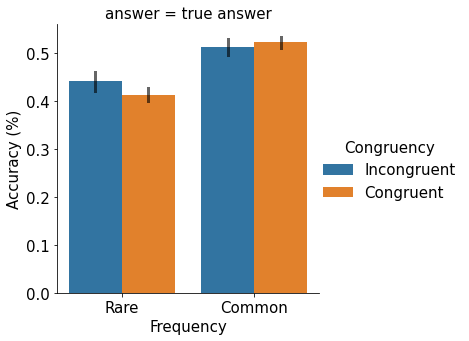

In [51]:
dfs2_2_accurcy_melt_3_way_copy = dfs2_2_accurcy_melt_3_way.copy()
display(dfs2_2.pivot_table(index=["participant"], 
                                columns=[common], values=[],
                                aggfunc=[len], fill_value=0).fillna(0))
#dfs2_2_accurcy_melt_3_way_copy.loc[dfs2_2_accurcy_melt_3_way_copy[common]== "widespread", "value"] = dfs2_2_accurcy_melt_3_way_copy["value"]/ 20

#dfs2_2_accurcy_melt_3_way_copy.loc[dfs2_2_accurcy_melt_3_way_copy[common]== "infrequent", "value"] = dfs2_2_accurcy_melt_3_way_copy["value"]/ len(dfs2_2_accurcy_melt_3_way_copy[common]== "infrequent")
aov = AnovaRM(
    dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
    depvar='value',
    subject="participant",
    within=['congruent', 'common']
    ).fit()
print(aov)
display(pt.rm_anova(dv='value', within=['congruent', 'common'],
  data=dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer')],
  subject="participant", detailed=True))

x=dfs2_2_accurcy_melt_3_way_copy.rename(columns = {'value':'Accuracy (%)'})
x=x.rename(columns = {infrequnce_error:'answer'})
x.loc[x["answer"] == 'true_answer',"answer"] = 'true answer'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent'
x=x.rename(columns = {congruent:'Congruency'})

x.loc[x["common"] == 'widespread',"common"] = 'Common'
x.loc[x["common"] == 'infrequent', "common"] = 'Rare'

x=x.rename(columns = {common:'Frequency'})


z = sn.catplot(kind='bar',
           data= x[x['answer'] == 'true answer'], ci=None,
           x='Frequency', col='answer', hue='Congruency', y='Accuracy (%)')

se = [0.0203, 0.017,0.014, 0.011]
create_se_on_graph(z, se)

## steps 2: t-test for widsp & true answer : conguent (%)

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.4834 1.0000 32.0000 0.4919


Paired t-test 

------------------  -----------
Sample size         33
Difference Mean     -0.00976295
t                   -0.695283
Df                  32
P-value (one-tail)   0.245948
P-value (two-tail)   0.491897
Lower 95.0%         -0.0383649
Upper 95.0%          0.018839
------------------  -----------
Rectangle(xy=(-0.4, 0), width=0.8, height=0.513177, angle=0)
[0.5053367248902199, 0.5210167248902198]
Rectangle(xy=(0.6, 0), width=0.8, height=0.52294, angle=0)
[0.515099674702384, 0.530779674702384]


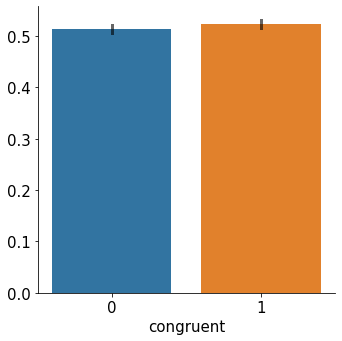

In [52]:
dfs_2_2_true_answer_common_a = dfs2_2_accurcy_melt_3_way_copy[(dfs2_2_accurcy_melt_3_way_copy[infrequnce_error] == 'true_answer') &
                              (dfs2_2_accurcy_melt_3_way_copy[common] == 'widespread')]
                              

aov = AnovaRM(
    dfs_2_2_true_answer_common_a,
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
print(aov)


dfs_2_2_true_answer_common = dfs_2_2_true_answer_common_a.pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0)                               
res = stat()
res.ttest(dfs_2_2_true_answer_common, res=[0,1], test_type=3)                
print(res.summary)
z = sn.catplot(kind='bar', ci=None,
           data= dfs_2_2_true_answer_common)

se = [0.00784, 0.00784]
create_se_on_graph(z, se)

## step 3: anova for error - widsp : kind of error & stroop

                          Anova
                           F Value  Num DF  Den DF Pr > F
---------------------------------------------------------
congruent                    0.7674 1.0000 32.0000 0.3875
infrequnce_error           401.7419 1.0000 32.0000 0.0000
congruent:infrequnce_error   0.8272 1.0000 32.0000 0.3699



,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,congruent,8.250000,1,32,8.250000,0.767442,3.875385e-01,3.875385e-01,0.002837,1.0
1,infrequnce_error,11704.916667,1,32,11704.916667,401.741866,1.117638e-19,1.117638e-19,0.801460,1.0
2,congruent * infrequnce_error,11.522727,1,32,11.522727,0.827249,3.698693e-01,3.698693e-01,0.003958,1.0


Rectangle(xy=(-0.4, 0), width=0.4, height=6.48485, angle=0)
[5.384848484848485, 7.584848484848484]
Rectangle(xy=(0.6, 0), width=0.4, height=24.7273, angle=0)
[23.653972727272727, 25.800572727272726]
Rectangle(xy=(-2.77556e-17, 0), width=0.4, height=6.39394, angle=0)
[4.756639393939394, 8.031239393939394]
Rectangle(xy=(1, 0), width=0.4, height=25.8182, angle=0)
[24.442181818181815, 27.194181818181818]


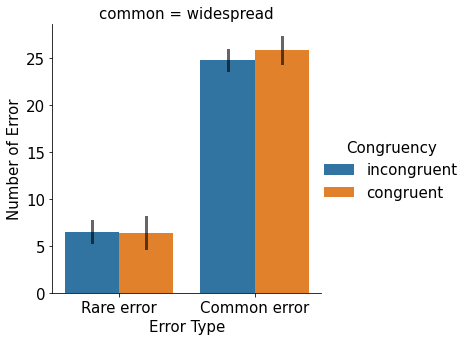

In [53]:
x_2_2 = dfs2_2_accurcy_melt_3_way[(dfs2_2_accurcy_melt_3_way['common'] == "widespread") &
                              (dfs2_2_accurcy_melt_3_way[infrequnce_error] != "true_answer")]
                              #  (dfs2_1_accurcy_melt_3_way['participant'] != 30 )] 
aov = AnovaRM(
    x_2_2,
    depvar='value',
    subject="participant",
    within=['congruent', infrequnce_error]
    ).fit()
print(aov)

display(pt.rm_anova(dv='value', within=['congruent', infrequnce_error],
  data=x_2_2,
  subject="participant", detailed=True))

x=x_2_2.rename(columns = {'value':'Number of Error'})
x=x.rename(columns = {infrequnce_error:'kind of error'})
x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Rare error'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Common error'
x.loc[x["congruent"] == 0.0,"congruent"] = 'incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'congruent'

x.loc[x['kind of error'] == 'infreq_answer',"kind of error"] = 'Uncertainty'
x.loc[x['kind of error'] == 'wides_answer',"kind of error"] = 'Perceptual'
x.loc[x["congruent"] == 0.0,"congruent"] = 'Incongruent'
x.loc[x["congruent"] == 1.0, "congruent"] = 'Congruent' 
x=x.rename(columns = {congruent:'Congruency'})
x=x.rename(columns = {"kind of error":'Error Type'})

z = sn.catplot(kind='bar',
           data=x,
           units='participant', ci=None,
           col='common', x='Error Type', hue='Congruency', y='Number of Error')
se = [1.1, 1.0733, 1.6373, 1.376]
create_se_on_graph(z, se)

##step 4: ttest for error - widsp & 

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
congruent  0.0363 1.0000 32.0000 0.8502


Paired t-test 

------------------  ----------
Sample size         33
Difference Mean      0.0909091
t                    0.190404
Df                  32
P-value (one-tail)   0.425098
P-value (two-tail)   0.850195
Lower 95.0%         -0.881631
Upper 95.0%          1.06345
------------------  ----------
Rectangle(xy=(-0.4, 0), width=0.8, height=6.48485, angle=0)
[6.072248484848484, 6.897448484848485]
Rectangle(xy=(0.6, 0), width=0.8, height=6.39394, angle=0)
[5.981339393939393, 6.806539393939394]


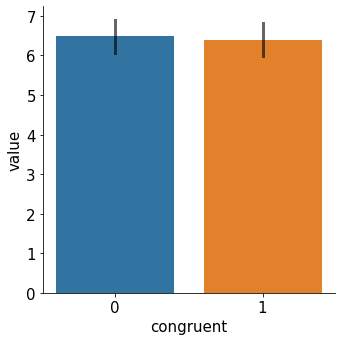

In [54]:
aov = AnovaRM(
    x_2_2[(x_2_2[infrequnce_error] == 'infreq_answer')],
    depvar='value',
    subject="participant",
    within=['congruent']
    ).fit()
print(aov)
x1 = x_2_2[x_2_2[infrequnce_error] == 'infreq_answer'].pivot_table(index=["participant"], 
                                columns=[congruent],values="value").fillna(0) 

res = stat()
res.ttest(x1, res=[0,1], test_type=3)                
print(res.summary)

z = sn.catplot(kind='bar', ci=None,
           data=x_2_2[x_2_2[infrequnce_error] == 'infreq_answer'],
           x='congruent', y='value')
se = [0.4126, 0.4126]
create_se_on_graph(z, se)


Paired t-test 

------------------  ----------
Sample size         33
Difference Mean     -0.0124541
t                   -0.388887
Df                  32
P-value (one-tail)   0.349968
P-value (two-tail)   0.699935
Lower 95.0%         -0.0776867
Upper 95.0%          0.0527785
------------------  ----------


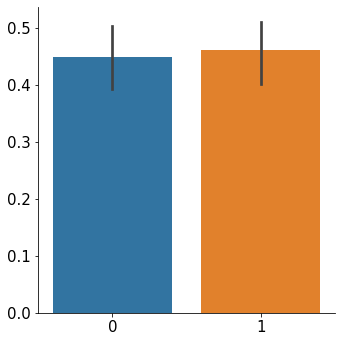

In [55]:
p = dfs2_2_accurcy_3_way_copy_without_precent
true_answer_0 = pd.DataFrame(p[(0, 'infrequent', 'true_answer')])
error_0 = pd.DataFrame(p[(0, 'widespread', 'infreq_answer')])
stroop_0 = (error_0.values / (error_0.values + true_answer_0.values)).reshape(1, -1).flatten()

true_answer_1 = pd.DataFrame(p[(1, 'infrequent', 'true_answer')])
error_1 = pd.DataFrame(p[(1, 'widespread', 'infreq_answer')])
stroop_1 = (error_1.values / (error_1.values + true_answer_1.values)).reshape(1, -1).flatten()

present_of_uncertanty = pd.DataFrame([stroop_0, stroop_1]).T
present_of_uncertanty

uncertanty_all = pd.DataFrame(((error_1.values+error_0.values) / (error_1.values + true_answer_1.values +
                                                error_0.values + true_answer_0.values)).reshape(1, -1).flatten())
#uncertanty_all = pd.DataFrame((error_1.values + true_answer_1.values + error_0.values + true_answer_0.values).reshape(1, -1).flatten())
uncertanty_all=uncertanty_all.rename(columns = {0:'rare choose'})
uncertanty_all = pd.DataFrame(p[participant]).merge(uncertanty_all, left_index=True, right_index=True)
res = stat()
res.ttest(present_of_uncertanty, res=[0,1], test_type=3)                
print(res.summary)
sn.catplot(kind='bar',
           data=present_of_uncertanty)

##correlation with question

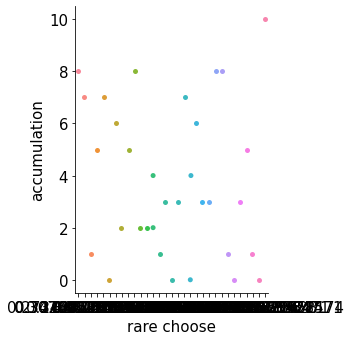

accumulation


(-0.10042608763273515, 0.5781640528435575)

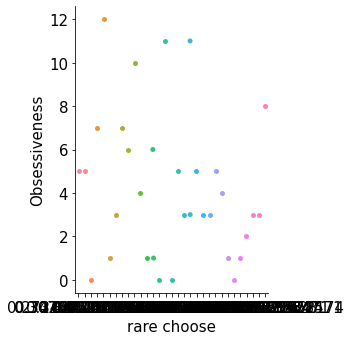

Obsessiveness


(-0.0925417149629841, 0.6085005166750065)

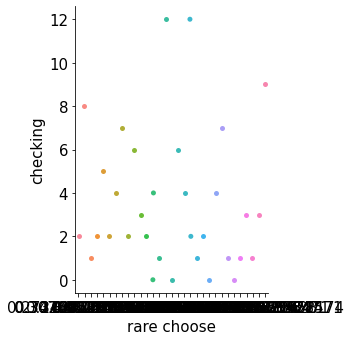

checking


(0.06868097766878285, 0.7041100159925555)

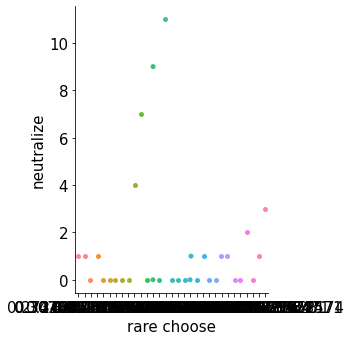

neutralize


(0.04742050847924319, 0.7932800250806528)

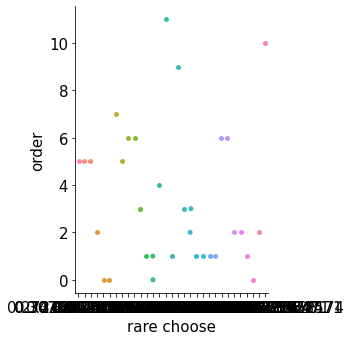

order


(-0.00026756029594608537, 0.9988209270999955)

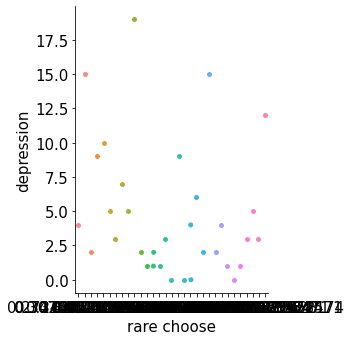

depression


(-0.11324801557570874, 0.5303317787590321)

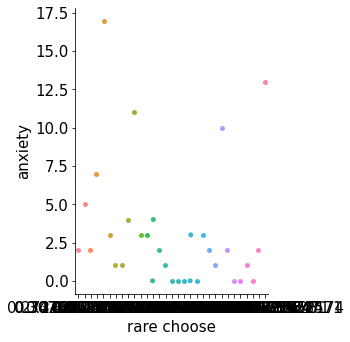

anxiety


(-0.03645230042264167, 0.8403896959232653)

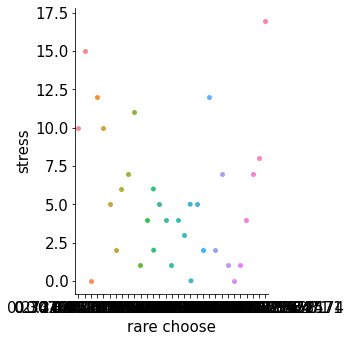

stress


(-0.08733587730422909, 0.6288921919451327)

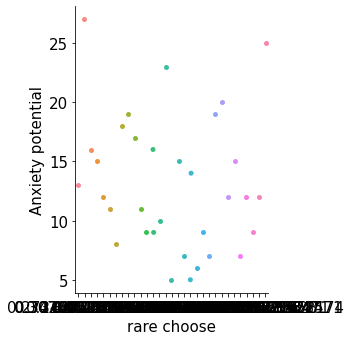

Anxiety potential


(-0.07949568254009692, 0.6601133409622187)

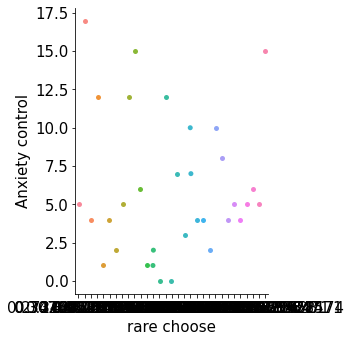

Anxiety control


(0.029406192227153613, 0.8709537580710373)

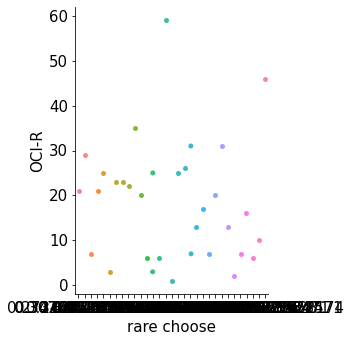

OCI-R


(0.022514815050534986, 0.9010252665710786)

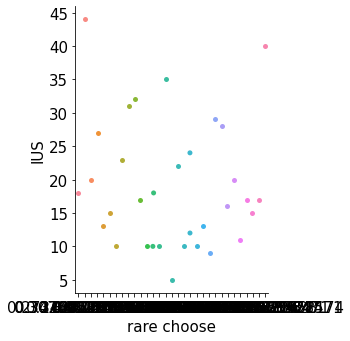

IUS


(-0.03296679597401338, 0.8554831062735448)

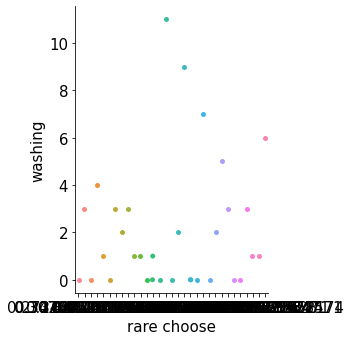

washing


(0.19893040475595364, 0.26706683970970074)

In [56]:
path_f = path + "/inhibitory_control&uncertainty&check_score.xlsx"
QR_score = pd.concat([pd.read_excel(path_f, sheet_name='Sheet0',na_values="").fillna(value = 0)])

for i in [52, 20, 41]:
  QR_score = QR_score.drop(QR_score[QR_score['participant'] == i].index)
QR_score = QR_score.sort_values(by=['participant'], ignore_index=True)
for i in ['accumulation', 'Obsessiveness', 'checking', 'neutralize',
          'order', 'depression', 'anxiety', 'stress', 'Anxiety potential',
          'Anxiety control', 'OCI-R', 'IUS', 'washing']:
    test_value = i
    a = pd.DataFrame(QR_score[test_value]).merge(uncertanty_all, left_index=True, right_index=True)
    sn.catplot(data=a,
              x='rare choose', y=test_value)
    # sn.regplot(data=a, ci=None,
    #           x='uncertanty', y=test_value)
    plt.show()
    print(i)
    display(pearsonr(a[test_value], a['rare choose']))

# anova part 2.1 & 2.2

                           Anova
                               F Value Num DF  Den DF Pr > F
------------------------------------------------------------
congruent                       8.8016 1.0000 32.0000 0.0057
infrequnce_error               23.9292 1.0000 32.0000 0.0000
exp                            65.7307 1.0000 32.0000 0.0000
congruent:infrequnce_error      0.0907 1.0000 32.0000 0.7652
congruent:exp                   6.0047 1.0000 32.0000 0.0199
infrequnce_error:exp           33.6214 1.0000 32.0000 0.0000
congruent:infrequnce_error:exp  1.0603 1.0000 32.0000 0.3109



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


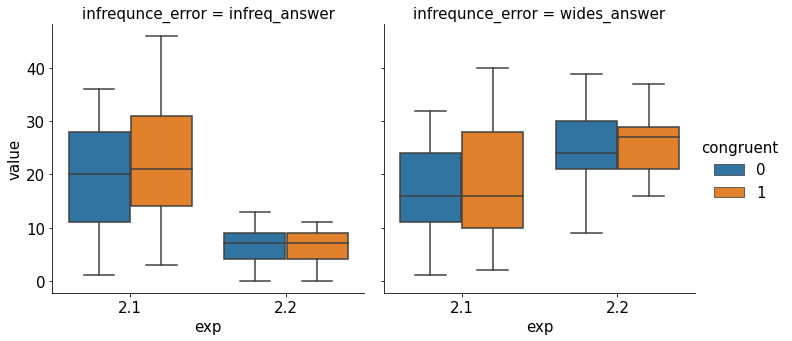

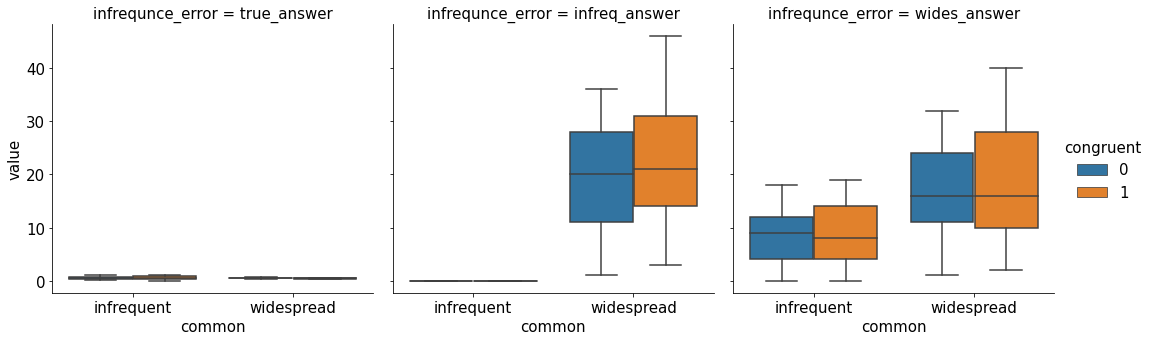

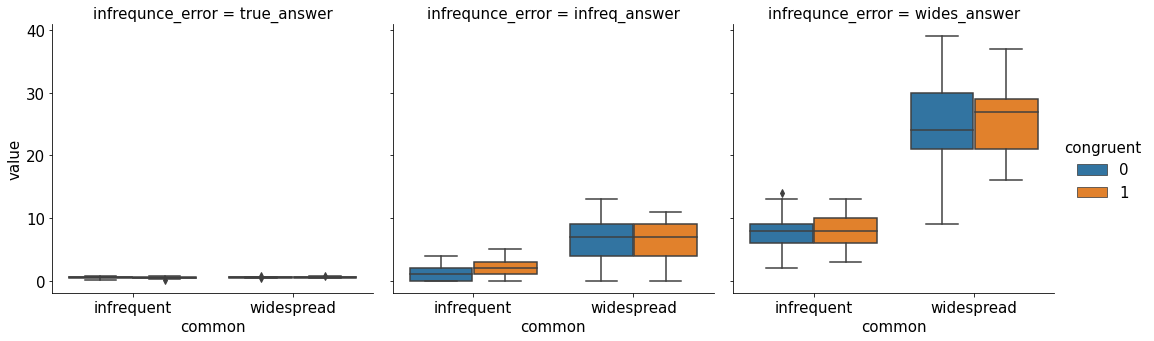

In [57]:
# dfs2_1_accurcy_melt_3_way['exp'] = [2.1]*len(dfs2_1_accurcy_melt_3_way)
# dfs2_2_accurcy_melt_3_way['exp'] = [2.2]*len(dfs2_2_accurcy_melt_3_way)
x_2_1['exp'] = [2.1]*len(x_2_1)
x_2_2['exp'] = [2.2]*len(x_2_2)
connect_data = pd.concat([x_2_1, x_2_2])
aov = AnovaRM(
    connect_data,
    depvar='value',
    subject="participant",
    within=[congruent, infrequnce_error, 'exp']
    ).fit()
print(aov)

sn.catplot(kind='box',
           data=connect_data,
           x='exp', col=infrequnce_error, hue='congruent', y='value')
hue_order = ['true_answer', 'infreq_answer', 'wides_answer']
sn.catplot(kind='box',
           data=dfs2_1_accurcy_melt_3_way,
           x='common', col=infrequnce_error, hue='congruent', col_order=hue_order, y='value')
sn.catplot(kind='box',
           data=dfs2_2_accurcy_melt_3_way,
          x='common', col=infrequnce_error,hue='congruent',col_order=hue_order, y='value')



In [58]:
display((dfs2_1_accurcy_melt_3_way[dfs2_1_accurcy_melt_3_way[infrequnce_error] == 'true_answer']).mean())
display((dfs2_2_accurcy_melt_3_way[dfs2_2_accurcy_melt_3_way[infrequnce_error] == 'true_answer']).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


participant    31.545455
congruent       0.500000
value           0.481048
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


participant    31.545455
congruent       0.500000
value           0.472778
dtype: float64

# just a test

In [59]:
#describe of the data
#display(dfs1_time_melt.groupby(["participant" ,'common', "congruent"])["value"].describe())
# graph for each praticipant
#sn.catplot(kind='box',data=dfs1_time_melt, x='participant',aspect=1, hue="congruent", col='common', y='value')

#kind='violin'
#kind='strip'
# sn.catplot(kind='point', join=False,
#             data=dfs1_time_melt, x="congruent", hue='common', y='value',units='participant')
# sn.catplot(kind='violin',data=dfs1_time_melt, x="congruent", col='common', y='value')

# sns.distplot( mydata[mydata.gender ==  '0' ].weight6weeks, ax = ax, label =  'Female' ) 

plt.show()

# Create pivot table

## Create pivot table part 1

In [60]:
# def pivot_table_for_part_1(dfs):
#     pivot_cerainty = dfs[(dfs[stroop_corr] == 1) & (dfs['test_certainty_anser_currect'] == 1) &
#                                   (dfs["test_certainty_mouse.time"] != 0)].pivot_table(
#             index=["participant"],
#             columns=[congruent, common], values=["test_certainty_mouse.time"],
#             aggfunc=[np.mean])
#     file_to_write = {part_1:[pivot_cerainty, "part_1"]}
#     return file_to_write
# file_to_write_part_1 = pivot_table_for_part_1(dfs1)
# file_to_write_part_1[part_1][0].head(5)

## add error of infrequnce

In [61]:
# def add_error_of_infrequnce(file):
#     file[infrequnce_error] = np.select([(file[experiment] == "certainty") &
#                                         ((file[click_name] == "two_up")
#                                          | (file[click_name] == "one_up") | (file[click_name] == "three_up") |
#                                          (file[click_name] == "four_up") | (file[click_name] == "one_down")
#                                          | (file[click_name] == "two_down") | (file[click_name] == "three_down"))],
#                                        [True], default=False)
#     file = file[(file[stroop_corr] == 1) & (file[infrequnce_error] == True)] \
#         .pivot_table(index=["participant"], columns=[congruent], values=[], aggfunc=[len])
#     file_new = pd.DataFrame([])
#     file_new[0] = file.xs((0), level='congruent', axis=1).sum(axis=1) if ('len', 0) in file.columns else 0
#     file_new[1] = file.xs((1), level='congruent', axis=1).sum(axis=1) if ('len', 1) in file.columns else 0
#     return file_new

## create pivot table - part 2

In [62]:
# def pivot_table_for_answer_currect_congruent_common(file):
#     return file.pivot_table(
#                 index=["participant"],
#                 columns=[answer_test_currect,congruent, common], values=[],
#         aggfunc=[len])
    
# def pivot_table_for_part_2(dfs):
#     pivot_cerainty = pivot_table_for_answer_currect_congruent_common(
#             dfs[(dfs[experiment] == "certainty") & (dfs[stroop_corr] == 1)])
#     pivot_error = add_error_of_infrequnce(dfs)
#     pivot_uncerainty = pivot_table_for_answer_currect_congruent_common(
#             dfs[(dfs[experiment] == "uncertainty") & (dfs[stroop_corr] == 1)])
#     pivot_click_on_not_image = pivot_table_for_answer_currect_congruent_common(
#             dfs[(dfs[experiment] == "uncertainty") & (dfs[stroop_corr] == 1) &
#                  (dfs["test_mouse_anser_rual.clicked_name"] == "three_right")])
#     file_to_write = {not_image_file_part_2: [pivot_click_on_not_image, "click_on_not_was_image"],
#                      cerainty_file_part_2: [pivot_cerainty, "certainty"],
#                      uncertainty_file_part_2: [pivot_uncerainty, "uncertainty"]}
#     return file_to_write, pivot_error
# file_to_write_part_2, pivot_error = pivot_table_for_part_2(dfs2)
# file_to_write_part_2[not_image_file_part_2][0].head(5)


In [63]:
#file_to_write_part_2[cerainty_file_part_2][0].head(5)

In [64]:
# file_to_write_part_2[uncertainty_file_part_2][0].head(5)

In [65]:
# pivot_error.head(5)

In [66]:
# from scipy import stats 
# import statsmodels.formula.api as smf
# from statsmodels.stats.anova import AnovaRM
# my_model_fit = smf.mixedlm("value ~ common * congruent", dfs1_time_melt, groups=dfs1_time_melt["participant"]).fit()
# my_model_fit.random_effects
# display(my_model_fit.summary())
# AnovaRM(dfs1_time_melt, 'value', 'participant', within=['common', 'congruent']).fit().anova_table

# # res = stat()
# # res.anova_stat(df=dfs1_accurcy_melt, res_var='value', anova_model='value ~ C(common) + C(congruent) + \
# # C(common):C(congruent)')
# # res.anova_summary

# def errre(result_1, result_2):
#   mean1, mean2 = np.mean(result_1), np.mean(result_2)
#   n = len(result_1)
#   # sum squared difference between observations
#   d1 = sum((result_1-result_2)**2)
#   # sum difference between observations
#   d2 = sum(result_1-result_2)
#   std_dev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
#   # standard error of the difference between a mean
#   se = std_dev / np.sqrt(n)
#   print(std_dev)
#   t_stat = (mean1 - mean2) / se
#   df = n - 1
#   # calculate the critical value
#   critical =stats.t.ppf(0.95, df)
#   p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
#   print(t_stat,critical,p)
# errre(a, b)